In [1]:
import numpy as np
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader
import datetime
import pandas_datareader.data as web
from scipy.stats import norm
import yfinance as yf
import cufflinks as cf
cf.go_offline()

In [2]:
dfticker = pd.read_csv("//Users//sjacob//stocks//GROWTHNOV23.csv", index_col = False)
tickers = []
length = len(dfticker)
for i in range(0,length):
    tickers.append(dfticker['Ticker'][i]+".NS")

In [3]:
data = pd.DataFrame()

data = yf.download(tickers,period="4y")
     
data = data['Adj Close']
        
data.to_csv("//Users//sjacob//stocks//QGRJUNE2023.csv")
data.dropna()

[*********************100%***********************]  48 of 48 completed


14 Failed downloads:
['POLYCHEM.NS', 'ELANTAS.NS', 'GUJTHEM.NS', 'INDXTRA.NS', 'SHILCTECH.NS', 'ANUHPHR.NS', 'NICCOPAR.NS', 'IBINFO.NS', 'FLUIDOM.NS', 'AXTEL.NS', '7TEC.NS', 'PAUSHAKLTD.NS', 'ZENOTECH.NS']: Exception('%ticker%: No data found, symbol may be delisted')
['TANFACIND.NS']: Exception("%ticker%: Period '4y' is invalid, must be one of ['1mo', '3mo', '6mo', 'ytd', '1y', '2y', '5y', '10y', 'max']")


Empty DataFrame
Columns: [7TEC.NS, ABB.NS, ACE.NS, ANUHPHR.NS, AXTEL.NS, BAJAJ-AUTO.NS, BEL.NS, BLS.NS, CAPLIPOINT.NS, CDSL.NS, DENORA.NS, ELANTAS.NS, FLUIDOM.NS, GANDHITUBE.NS, GOLDIAM.NS, GUJTHEM.NS, HAL.NS, HERCULES.NS, IBINFO.NS, ICICIGI.NS, INDRAMEDCO.NS, INDXTRA.NS, INGERRAND.NS, LAXMIMACH.NS, LINC.NS, LINCOLN.NS, MAZDA.NS, NICCOPAR.NS, NINSYS.NS, PAUSHAKLTD.NS, PGHH.NS, PIIND.NS, POLYCHEM.NS, RITES.NS, RPGLIFE.NS, SHANTIGEAR.NS, SHILCTECH.NS, SKFINDIA.NS, SPLPETRO.NS, TANFACIND.NS, TDPOWERSYS.NS, TIPSINDLTD.NS, TRITURBINE.NS, VINATIORGA.NS, VOLTAMP.NS, WENDT.NS, WONDERLA.NS, ZENOTECH.NS]
Index: []

[0 rows x 48 columns]

In [4]:
returns = np.log(data / data.shift(1))
vols = returns.std() * 252 ** 0.5 *100
vols

7TEC.NS                NaN
ABB.NS           32.979077
ACE.NS           51.998202
ANUHPHR.NS             NaN
AXTEL.NS               NaN
BAJAJ-AUTO.NS    27.558305
BEL.NS           38.304644
BLS.NS           59.093968
CAPLIPOINT.NS    46.603836
CDSL.NS          38.477111
DENORA.NS        60.769078
ELANTAS.NS             NaN
FLUIDOM.NS             NaN
GANDHITUBE.NS    43.597240
GOLDIAM.NS       51.682870
GUJTHEM.NS             NaN
HAL.NS           37.429795
HERCULES.NS      50.315147
IBINFO.NS              NaN
ICICIGI.NS       30.828070
INDRAMEDCO.NS    44.712926
INDXTRA.NS             NaN
INGERRAND.NS     35.768735
LAXMIMACH.NS     36.059317
LINC.NS          49.996791
LINCOLN.NS       42.632305
MAZDA.NS         46.358096
NICCOPAR.NS            NaN
NINSYS.NS        54.282401
PAUSHAKLTD.NS          NaN
PGHH.NS          22.904065
PIIND.NS         33.499646
POLYCHEM.NS            NaN
RITES.NS         35.297934
RPGLIFE.NS       46.489273
SHANTIGEAR.NS    48.079291
SHILCTECH.NS           NaN
S

In [5]:
annual_returns = returns.mean() * 252 * 100
annual_returns

7TEC.NS                 NaN
ABB.NS            27.216080
ACE.NS            58.810283
ANUHPHR.NS              NaN
AXTEL.NS                NaN
BAJAJ-AUTO.NS     17.495207
BEL.NS            33.512450
BLS.NS            69.997312
CAPLIPOINT.NS     24.646123
CDSL.NS           48.960483
DENORA.NS         53.504167
ELANTAS.NS              NaN
FLUIDOM.NS              NaN
GANDHITUBE.NS     25.207092
GOLDIAM.NS        40.348673
GUJTHEM.NS              NaN
HAL.NS            47.648117
HERCULES.NS       31.541279
IBINFO.NS               NaN
ICICIGI.NS         1.375600
INDRAMEDCO.NS     36.924870
INDXTRA.NS              NaN
INGERRAND.NS      39.315508
LAXMIMACH.NS      33.546647
LINC.NS           32.867228
LINCOLN.NS        31.715619
MAZDA.NS          35.224495
NICCOPAR.NS             NaN
NINSYS.NS        114.663251
PAUSHAKLTD.NS           NaN
PGHH.NS           11.209020
PIIND.NS          23.629346
POLYCHEM.NS             NaN
RITES.NS          16.764358
RPGLIFE.NS        41.593803
SHANTIGEAR.NS     39

In [6]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import pandas_datareader.data as web
import datetime
import math

class ValueAtRiskMonteCarlo:
    
    def __init__(self, S, mu, sigma, c, n, iterations):
        self.S = S
        self.mu = mu
        self.sigma = sigma
        self.c = c
        self.n = n
        self.iterations = iterations 

    def simulation(self):
        stock_data = np.zeros([self.iterations, 1])	
        rand = np.random.normal(0, 1, [1, self.iterations])

        #equation for the S(t) stock price
        stock_price = self.S*np.exp(self.n*(self.mu - 0.5*self.sigma**2)+self.sigma*np.sqrt(self.n)*rand)
        #we have to sort the stock prices to determine the percentile
        stock_price = np.sort(stock_price)

        #it depends on the confidence level: 95% -> 5 and 99% -> 1
        percentile = np.percentile(stock_price,(1-self.c)*100)

        return self.S-percentile

In [7]:

df = pd.DataFrame(columns = ['Ticker', 'Cov_mar','Market_var','Beta','Volatility%','Return%','CV','Sharp Ratio','CAGR','MAXDD%','Value at Risk']) 
data = pd.DataFrame()
data['^BSESN'] = yf.download('^BSESN',period="3y").Close

for t in tickers:
    try:
        data[t] = yf.download(t,period="3y").Close 
    except:
        continue
    sec_returns = np.log( data / data.shift(1) )
    cov = sec_returns.cov()*252
    cov_with_market = cov[t][0]
 
      
    dr = data[t].pct_change()
    dcum = (1 + dr).cumprod()
    n = len(data)/252
    CAGR = ((dcum[-1])**(1/n) - 1)*100
      
 
    
    droll = dcum.cummax()
    ddw = droll - dcum
    ddmax = ddw/droll
    max_dd = (ddmax.max())*100
   
 

    market_var = sec_returns['^BSESN'].var() * 252

    returns = np.log(data[t] / data[t].shift(1))
    MSFT_beta = cov_with_market / market_var
    MSFT_er = returns.mean()*252
    Sharp = (MSFT_er - 0.05) / (sec_returns[t].std() * 252 ** 0.5)
   

    #returns = np.log(data[t] / data[t].shift(1))
    vols = returns.std() * 252 ** 0.5 *100
    annual_returns = returns.mean() * 252 * 100
    CV = (vols/annual_returns)*100
    S = 100000    #this is the investment (stocks or whatever)
    c=0.95   #condifence level: this time it is 99%
    n = 730   #1 day 
    iterations = 100000 #number of paths in the Monte-Carlo simulation
    mu = np.mean(returns)
    sigma = np.mean(returns.std())

    model = ValueAtRiskMonteCarlo(S,mu,sigma,c,n,iterations)
    val = model.simulation()
    df.loc[len(df.index)] = [t,cov_with_market,market_var,MSFT_beta,vols,annual_returns,CV,Sharp,CAGR,max_dd,val] 
    
    
  

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ELANTAS.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['SHILCTECH.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AXTEL.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZENOTECH.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TANFACIND.NS']: Exception("%ticker%: Period '3y' is invalid, must be one of ['1mo', '3mo', '6mo', 'ytd', '1y', '2y', '5y', '10y', 'max']")



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['PAUSHAKLTD.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['NICCOPAR.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed


1 Failed download:
['GUJTHEM.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['IBINFO.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['INDXTRA.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed


1 Failed download:
['FLUIDOM.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ANUHPHR.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['POLYCHEM.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed


1 Failed download:
['7TEC.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
df1 = df[(df['CAGR']>10 ) & (df['Return%']>10)]
df2 = df1.sort_values(by='Return%', ascending=False)
df2

Ticker   Cov_mar  Market_var      Beta  Volatility%     Return%  \
0       NINSYS.NS  0.001265    0.022562  0.056087    54.282401  114.663251   
6   TIPSINDLTD.NS  0.016306    0.022562  0.722682    47.095419   92.724284   
3          BLS.NS  0.023498    0.022562  1.041449    53.179395   88.449875   
9          ACE.NS  0.025754    0.022562  1.141444    48.805588   83.595739   
15      DENORA.NS  0.014204    0.022562  0.629560    61.076695   73.601026   
26    WONDERLA.NS  0.018621    0.022562  0.825294    41.333032   60.381111   
7   TRITURBINE.NS  0.019362    0.022562  0.858170    46.836749   59.263237   
34         HAL.NS  0.017747    0.022562  0.786588    31.810778   58.837986   
31     VOLTAMP.NS  0.015068    0.022562  0.667818    41.733555   56.856343   
13   INGERRAND.NS  0.013124    0.022562  0.581669    39.086314   53.850239   
2          ABB.NS  0.012619    0.022562  0.559271    31.871736   52.916896   
25        LINC.NS  0.017517    0.022562  0.776363    48.753455   51.869296   
27         BEL.NS  0.019271    0.022562  0.854112    32.159484   51.547204   
10  SHANTIGEAR.NS  0.017597    0.022562  0.779916    44.439397   51.419810   
24     RPGLIFE.NS  0.013283    0.022562  0.588709    42.701393   50.021985   
35    SPLPETRO.NS  0.010403    0.022562  0.461073    37.907953   49.255405   
42     GOLDIAM.NS  0.022771    0.022562  1.009233    49.613307   48.886646   
5        WENDT.NS  0.014009    0.022562  0.620901    40.441553   46.965699   
47    HERCULES.NS  0.023932    0.022562  1.060696    46.429916   44.875706   
41  INDRAMEDCO.NS  0.017353    0.022562  0.769091    39.269168   42.718938   
38  GANDHITUBE.NS  0.018688    0.022562  0.828285    43.351261   42.493750   
8         CDSL.NS  0.019809    0.022562  0.877943    35.100154   41.257988   
22   LAXMIMACH.NS  0.015696    0.022562  0.695649    33.069115   40.055899   
17    SKFINDIA.NS  0.013073    0.022562  0.579407    29.592233   39.717064   
39       MAZDA.NS  0.013209    0.022562  0.585428    44.427095   30.926002   
46     LINCOLN.NS  0.015163    0.022562  0.672041    36.916559   29.916481   
19  TDPOWERSYS.NS  0.026604    0.022562  1.179121   108.524869   29.060767   
33  CAPLIPOINT.NS  0.012310    0.022562  0.545613    37.904928   26.131603   
30  BAJAJ-AUTO.NS  0.014449    0.022562  0.640401    23.252563   20.744626   
43       RITES.NS  0.011213    0.022562  0.496987    32.934723   20.571560   
1         PGHH.NS  0.007386    0.022562  0.327378    22.425234   18.406470   
14       PIIND.NS  0.017393    0.022562  0.770897    31.156091   15.309163   
18  VINATIORGA.NS  0.009790    0.022562  0.433915    29.015092   13.981585   

            CV  Sharp Ratio        CAGR     MAXDD%  Value at Risk  
0    47.340713     2.020236   30.400263  33.844305 -296228.950970  
6    50.790815     1.862692  152.437843  45.392485 -184359.331254  
3    60.123766     1.569214  141.888890  38.641955  -94611.459009  
9    58.382865     1.610384  130.442752  36.268873 -104423.561490  
15   82.983483     1.123195  108.552300  35.664564   11461.569261  
26   68.453580     1.339875   82.759053  28.015302  -40952.087343  
7    79.031708     1.158561   80.730132  31.684732   -8825.550605  
34   54.065036     1.692445   79.964237  18.221426  -95223.524226  
31   73.401757     1.242558   76.437796  31.442913  -25585.000158  
13   72.583361     1.249804   71.219749  24.483418  -27497.696845  
2    60.229791     1.503429   69.631246  21.263625  -64092.140505  
25   93.992898     0.961353   67.865831  29.308499   18277.649642  
27   62.388417     1.447387   67.326744  22.007849  -55869.664695  
10   86.424663     1.044564   67.114002  28.747176    3347.342747  
24   85.365251     1.054345   64.797392  35.861252     915.158384  
35   76.962016     1.167444   63.540606  32.164720  -17465.053657  
42  101.486421     0.884574   62.939454  45.219532   28533.174363  
5    86.108701     1.037688   62.238070  20.658482     500.522332  
47  103.463367     0.858836   56.541831  35.714285   27447.189225 

In [9]:
df2.to_csv("//Users//sjacob//stocks//QUALITYNOV23.csv")

In [10]:
pf_data = pd.DataFrame()
for t in df1["Ticker"]:
    pf_data[t] =  yf.download(t,period="3y").Close 

log_returns = np.log(pf_data / pf_data.shift(1))
num_assets = len(df1["Ticker"])
num_assets
weights = np.random.random(num_assets)
weights /= np.sum(weights)
np.sum(weights * log_returns.mean()) * 252
np.dot(weights.T, np.dot(log_returns.cov() * 252, weights))
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights)))
pfolio_returns = []
pfolio_volatilities = []
wts = []
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 252)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights))))
    wts.append(weights)
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
wts= np.array(wts)
pfolio_returns, pfolio_volatilities
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
#portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
#plt.xlabel('Expected Volatility')
#plt.ylabel('Expected Return')


portfolios.iplot(kind="scatter",
              x="Volatility", y='Return',
              mode='markers',
              xTitle="Volatility", yTitle="Return",
              title="========Volatility-------Return=========================",theme="solar")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import pandas_datareader.data as web
import datetime
import math

class ValueAtRiskMonteCarlo:
    
    def __init__(self, S, mu, sigma, c, n, iterations):
        self.S = S
        self.mu = mu
        self.sigma = sigma
        self.c = c
        self.n = n
        self.iterations = iterations 

    def simulation(self):
        stock_data = np.zeros([self.iterations, 1])	
        rand = np.random.normal(0, 1, [1, self.iterations])

        #equation for the S(t) stock price
        stock_price = self.S*np.exp(self.n*(self.mu - 0.5*self.sigma**2)+self.sigma*np.sqrt(self.n)*rand)
        #we have to sort the stock prices to determine the percentile
        stock_price = np.sort(stock_price)

        #it depends on the confidence level: 95% -> 5 and 99% -> 1
        percentile = np.percentile(stock_price,(1-self.c)*100)

        return self.S-percentile

if __name__ == "__main__":
    S = 100000    #this is the investment (stocks or whatever)
    c=0.95   #condifence level: this time it is 99%
    n = 730   #1 day 
    iterations = 100000 #number of paths in the Monte-Carlo simulation

    #historical data to approximate mean and standard deviation
    d = {}

    #download stock related data from Yahoo Finance
    for t in df1["Ticker"]:
        citi = yf.download(t,period="3y")
           #we can use pct_change() to calculate daily returns
        citi['returns'] = citi['Close'].pct_change()

    #we can assume daily returns to be normally sidtributed: mean and variance (standard deviation)
    #can describe the process
        mu = np.mean(citi['returns'])
        sigma = np.std(citi['returns'])

        model = ValueAtRiskMonteCarlo(S,mu,sigma,c,n,iterations)
        val = model.simulation()
        d[t] = val
        print("VALUE AT RSIK for {} is".format(t))
        print('Value at risk with Monte-Carlo simulation in INR: %0.2f' % val)
    print("The minimum value at risk for the portofolios are:")
    print(min(d.values()))

[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for NINSYS.NS is
Value at risk with Monte-Carlo simulation in INR: -500540.32
[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for PGHH.NS is
Value at risk with Monte-Carlo simulation in INR: 9721.90
[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for ABB.NS is
Value at risk with Monte-Carlo simulation in INR: -88779.42
[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for BLS.NS is
Value at risk with Monte-Carlo simulation in INR: -181444.11
[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for WENDT.NS is
Value at risk with Monte-Carlo simulation in INR: -24767.88
[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for TIPSINDLTD.NS is
Value at risk with Monte-Carlo simulation in INR: -284532.91
[*********************100%******************

In [12]:
for key,value in d.items():
    print(" The Value at risk per 1L invested in stock {} is {:0.2f}".format(key,value))

 The Value at risk per 1L invested in stock NINSYS.NS is -500540.32
 The Value at risk per 1L invested in stock PGHH.NS is 9721.90
 The Value at risk per 1L invested in stock ABB.NS is -88779.42
 The Value at risk per 1L invested in stock BLS.NS is -181444.11
 The Value at risk per 1L invested in stock WENDT.NS is -24767.88
 The Value at risk per 1L invested in stock TIPSINDLTD.NS is -284532.91
 The Value at risk per 1L invested in stock TRITURBINE.NS is -45509.86
 The Value at risk per 1L invested in stock CDSL.NS is -21832.27
 The Value at risk per 1L invested in stock ACE.NS is -177277.44
 The Value at risk per 1L invested in stock SHANTIGEAR.NS is -24783.71
 The Value at risk per 1L invested in stock INGERRAND.NS is -53788.17
 The Value at risk per 1L invested in stock PIIND.NS is 35505.62
 The Value at risk per 1L invested in stock DENORA.NS is -44705.08
 The Value at risk per 1L invested in stock SKFINDIA.NS is -34858.23
 The Value at risk per 1L invested in stock VINATIORGA.NS i

In [13]:
df2.reset_index(inplace = True)

In [14]:
import plotly.graph_objects as go

# Assuming you have already created the 'df2' DataFrame

fig = go.Figure(data=go.Scatter(x=df2["CV"], y=df2["Value at Risk"], mode='markers'))
fig.update_layout(title="========VOL------CV========================",
                  xaxis_title="CV", yaxis_title="VAR",
                  xaxis=dict(title="Volatility"),
                  yaxis=dict(title="CV"),
                  showlegend=False,
                  template="plotly_dark")  # Choose a theme here if you'd like, e.g., "plotly", "plotly_white", etc.

fig.show()

In [15]:
import plotly.graph_objects as go

# Assuming you have already created the 'df2' DataFrame

fig = go.Figure(data=go.Scatter(x=df2["Return%"], y=df2["Volatility%"], mode='markers'))
fig.update_layout(title="========VOL------CV========================",
                  xaxis_title="Volatility", yaxis_title="CV",
                  xaxis=dict(title="Volatility"),
                  yaxis=dict(title="CV"),
                  showlegend=False,
                  template="plotly_dark")  # Choose a theme here if you'd like, e.g., "plotly", "plotly_white", etc.

fig.show()

In [16]:
import plotly.graph_objects as go

# Assuming you have already created the 'df2' DataFrame

fig = go.Figure(data=go.Scatter(x=df2["Return%"], y=df2["CV"], mode='markers'))
fig.update_layout(title="========VOL------CV========================",
                  xaxis_title="Volatility", yaxis_title="CV",
                  xaxis=dict(title="Volatility"),
                  yaxis=dict(title="CV"),
                  showlegend=False,
                  template="plotly_dark")  # Choose a theme here if you'd like, e.g., "plotly", "plotly_white", etc.

fig.show()

In [17]:
import plotly.graph_objects as go

# Assuming you have already created the 'df2' DataFrame

fig = go.Figure(data=go.Scatter(x=df2["Volatility%"], y=df2["Value at Risk"], mode='markers'))
fig.update_layout(title="========VOL------CV========================",
                  xaxis_title="Volatility", yaxis_title="Value at Risk",
                  xaxis=dict(title="Volatility"),
                  yaxis=dict(title="VAR"),
                  showlegend=False,
                  template="plotly_dark")  # Choose a theme here if you'd like, e.g., "plotly", "plotly_white", etc.

fig.show()

In [18]:
norm = data.div(data.iloc[0,:]).mul(100)
norm.iplot(title="Comparision Analysis",xTitle='Date',yTitle="Normalized Price", fill = True, theme="pearl")

In [19]:
norm.iplot(title="Comparision Analysis",xTitle='Date',yTitle="Normalized Price", fill = True, theme="pearl")

In [20]:
ret = data.pct_change().dropna()

ret.iplot(kind="hist", bins=50, histnorm=None,theme="pearl")

In [21]:
import plotly.graph_objects as go

# Assuming you have already created the 'df2' DataFrame

fig = go.Figure(data=go.Scatter(x=df2["Volatility%"], y=df2["CV"], mode='markers'))
fig.update_layout(title="========VOL------CV========================",
                  xaxis_title="Volatility", yaxis_title="CV",
                  xaxis=dict(title="Volatility"),
                  yaxis=dict(title="CV"),
                  showlegend=False,
                  template="plotly_dark")  # Choose a theme here if you'd like, e.g., "plotly", "plotly_white", etc.

fig.show()

In [22]:
import plotly.graph_objects as go

# Assuming you have already created the 'df2' DataFrame
# Assuming you have a column in 'df2' named 'Ticker' for custom labels

fig = go.Figure()

scatter_trace = go.Scatter(
    x=df2["Volatility%"],
    y=df2["CV"],
    mode='markers+text',  # Use 'markers+text' mode to show text labels on markers
    text=df2["Ticker"],   # Use the 'Ticker' column as the label for each data point
    textposition="bottom center",  # Position of the text relative to the markers
    marker=dict(size=10)  # Adjust marker size as needed
)

fig.add_trace(scatter_trace)

fig.update_layout(
    title="========VOL------CV========================",
    xaxis_title="Volatility",
    yaxis_title="CV",
    xaxis=dict(title="Volatility"),
    yaxis=dict(title="CV"),
    showlegend=False,
    template="plotly_dark"  # Choose a theme here if you'd like, e.g., "plotly", "plotly_white", etc.
)

fig.show()

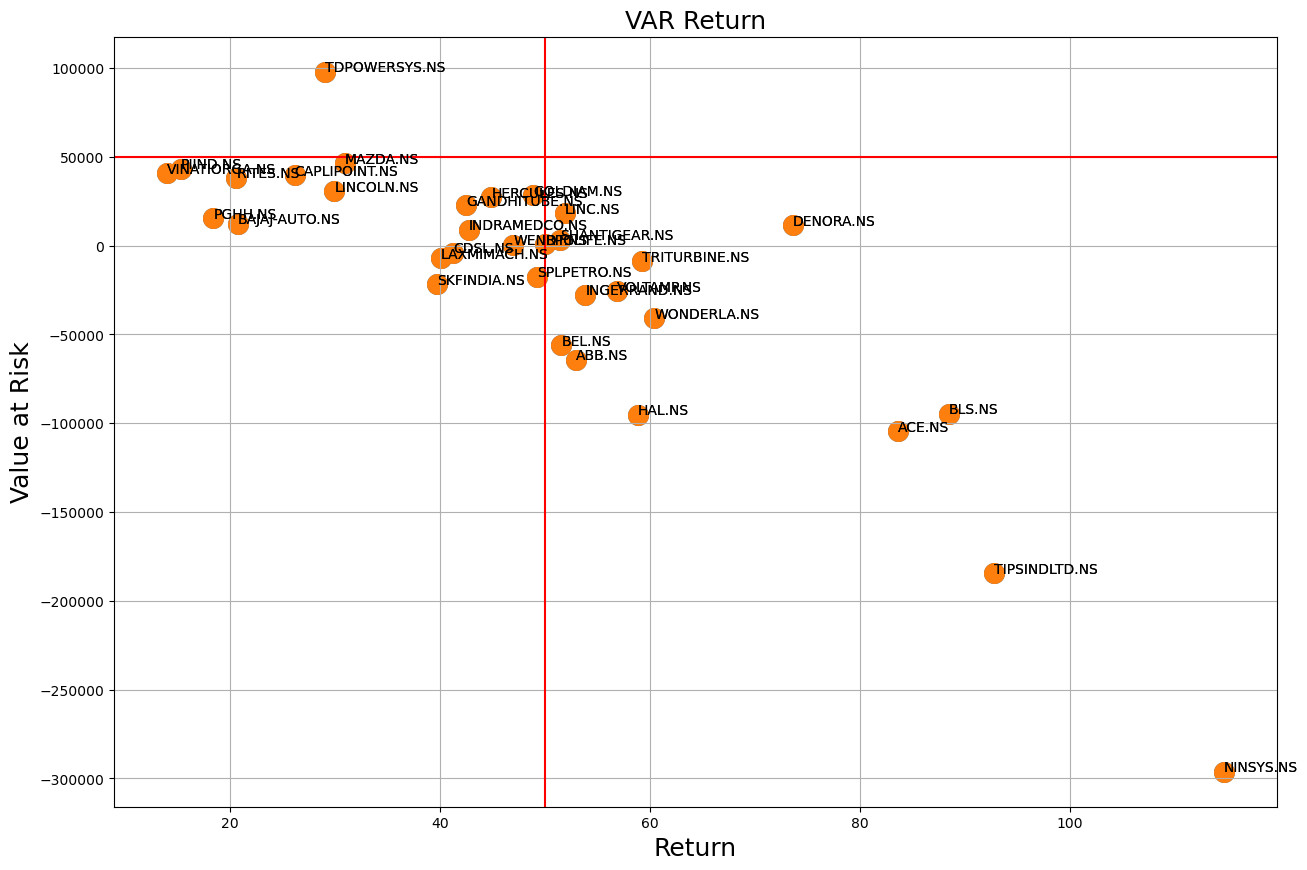

In [23]:
plt.figure(figsize=[15,10])
x= df2['Return%']
y = df2['Value at Risk']
annotations = df2["Ticker"]
plt.grid(True)
plt.title('VAR Return', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

plt.show()

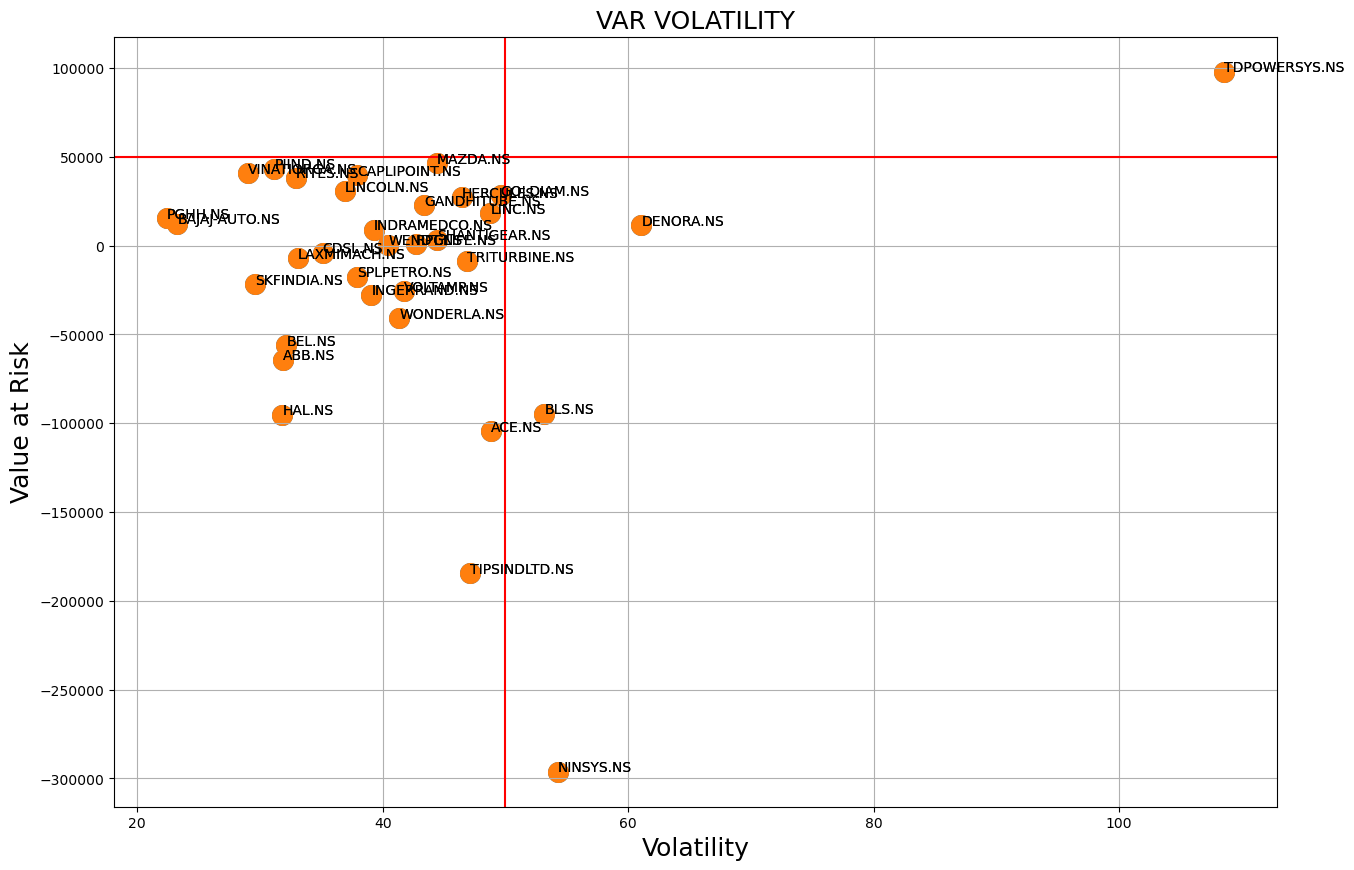

In [24]:
plt.figure(figsize=[15,10])
x= df2['Volatility%']
y = df2['Value at Risk']
annotations = df2["Ticker"]
plt.grid(True)
plt.title('VAR VOLATILITY', fontsize=18, color='black')
plt.xlabel("Volatility",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

plt.show()

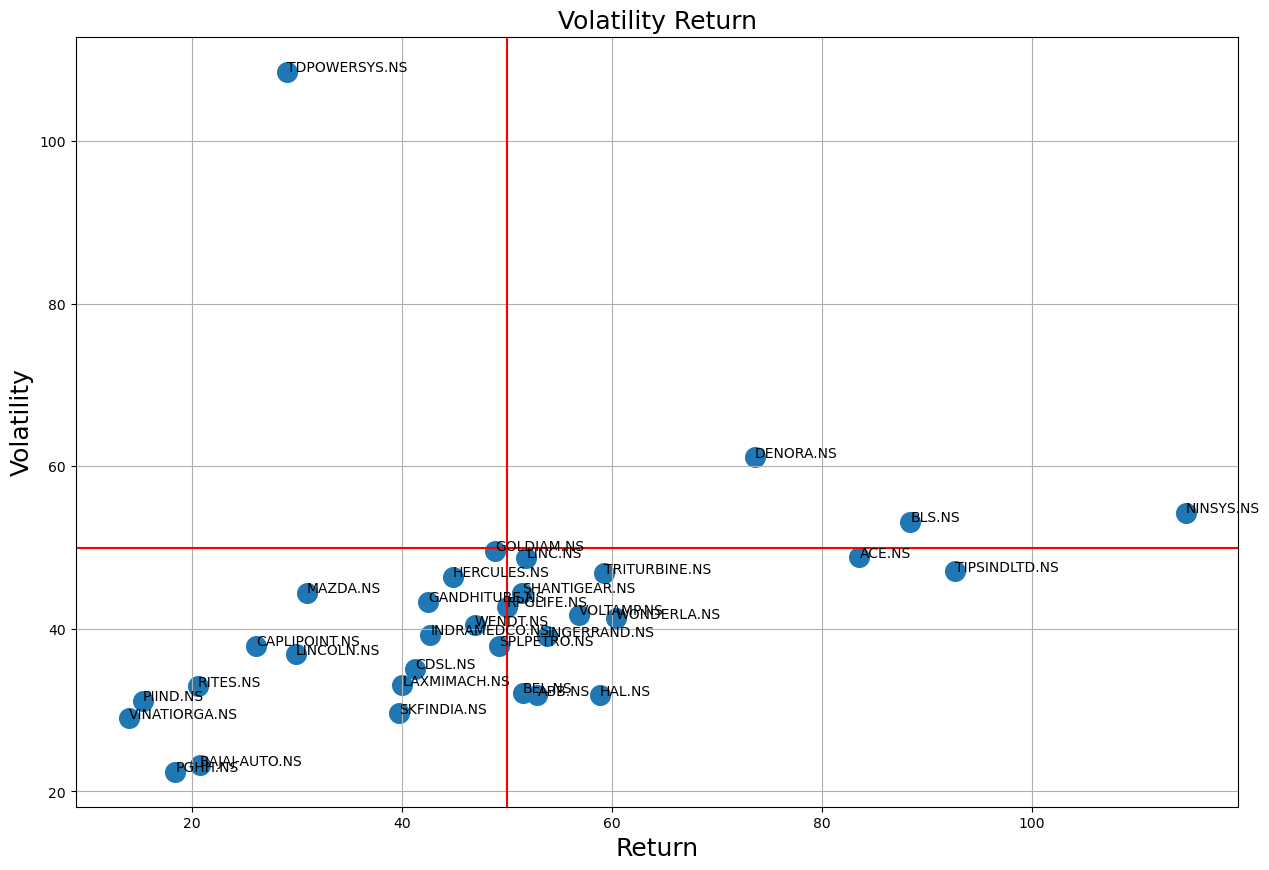

In [25]:
plt.figure(figsize=[15,10])
x= df2['Return%']
y = df2['Volatility%']
annotations = np.array(df2["Ticker"])
plt.grid(True)
plt.title('Volatility Return', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("Volatility", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
i=0
for labels in annotations:
    plt.annotate(labels, (x[i], y[i]))
    i=i+1
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50, color='r', linestyle='-')
plt.show()

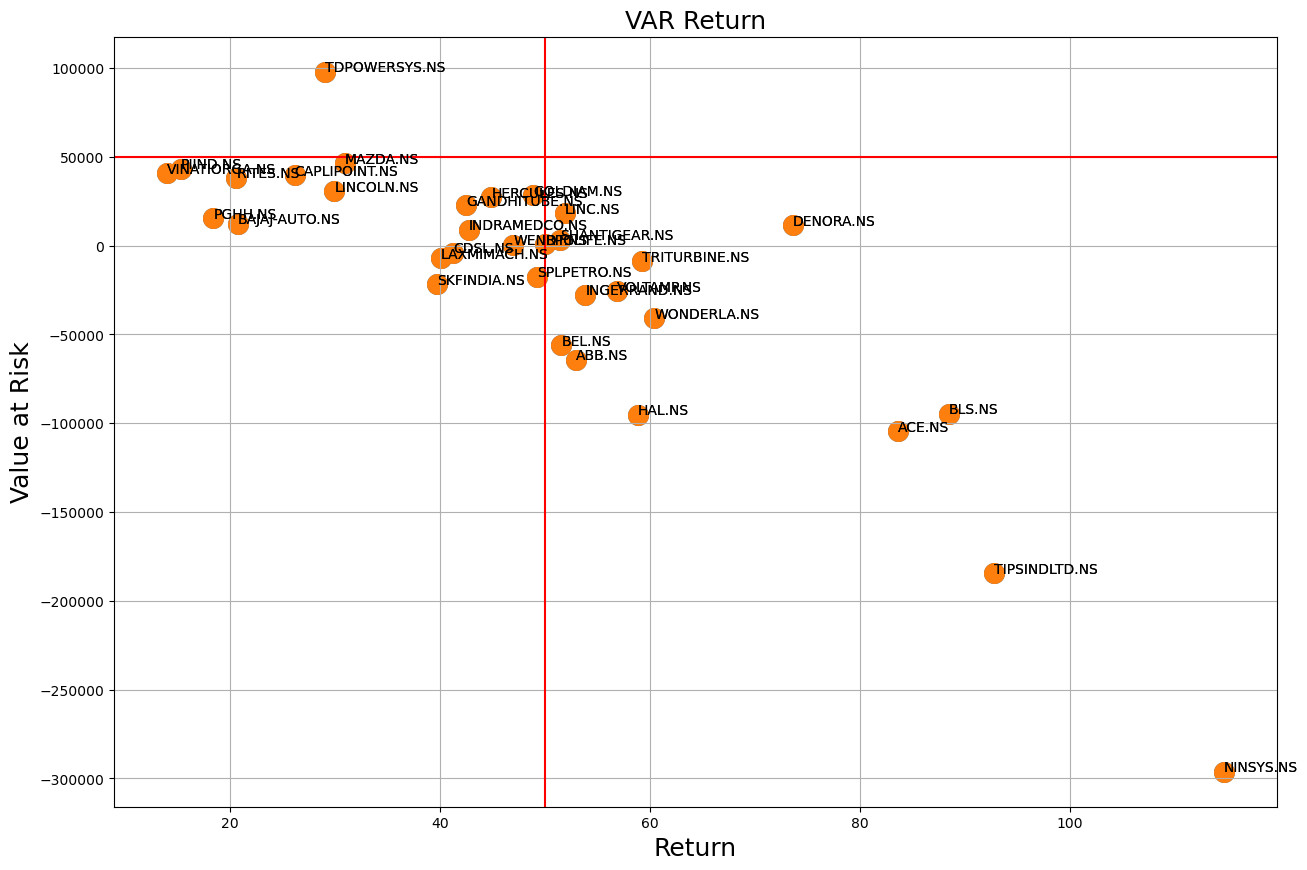

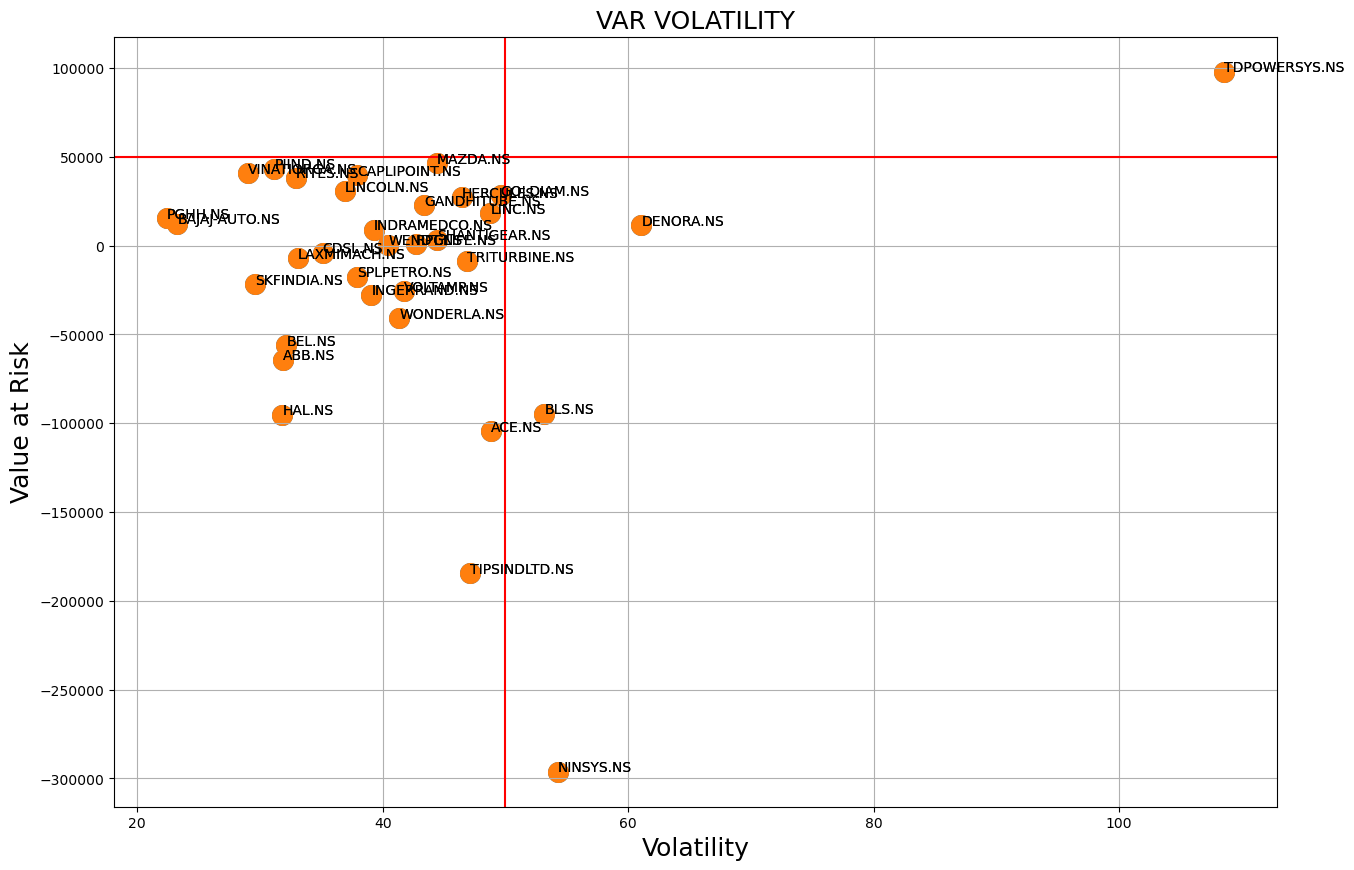

In [26]:
plt.figure(figsize=[15,10])
x= df2['Return%']
y = df2['Value at Risk']
annotations = df2["Ticker"]
plt.grid(True)
plt.title('VAR Return', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

plt.figure(figsize=[15,10])
x= df2['Volatility%']
y = df2['Value at Risk']
annotations = df2["Ticker"]
plt.grid(True)
plt.title('VAR VOLATILITY', fontsize=18, color='black')
plt.xlabel("Volatility",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

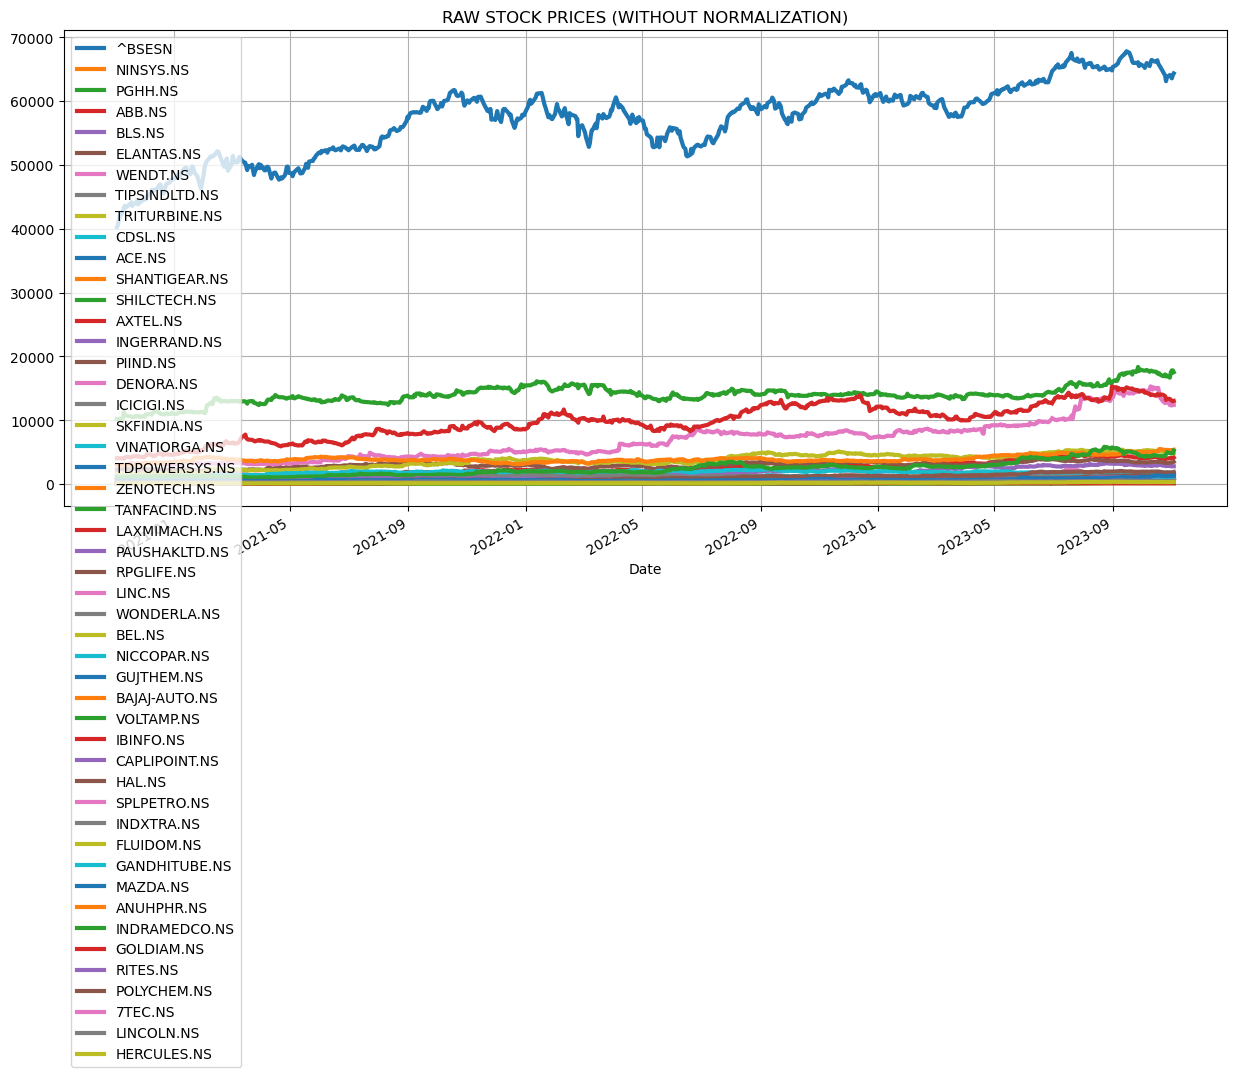

In [27]:
stocks_df = data
def show_plot(df, fig_title):
  df.plot(x = 'Date', figsize = (15,7), linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()
stocks_df = stocks_df.reset_index()
show_plot(stocks_df, 'RAW STOCK PRICES (WITHOUT NORMALIZATION)')

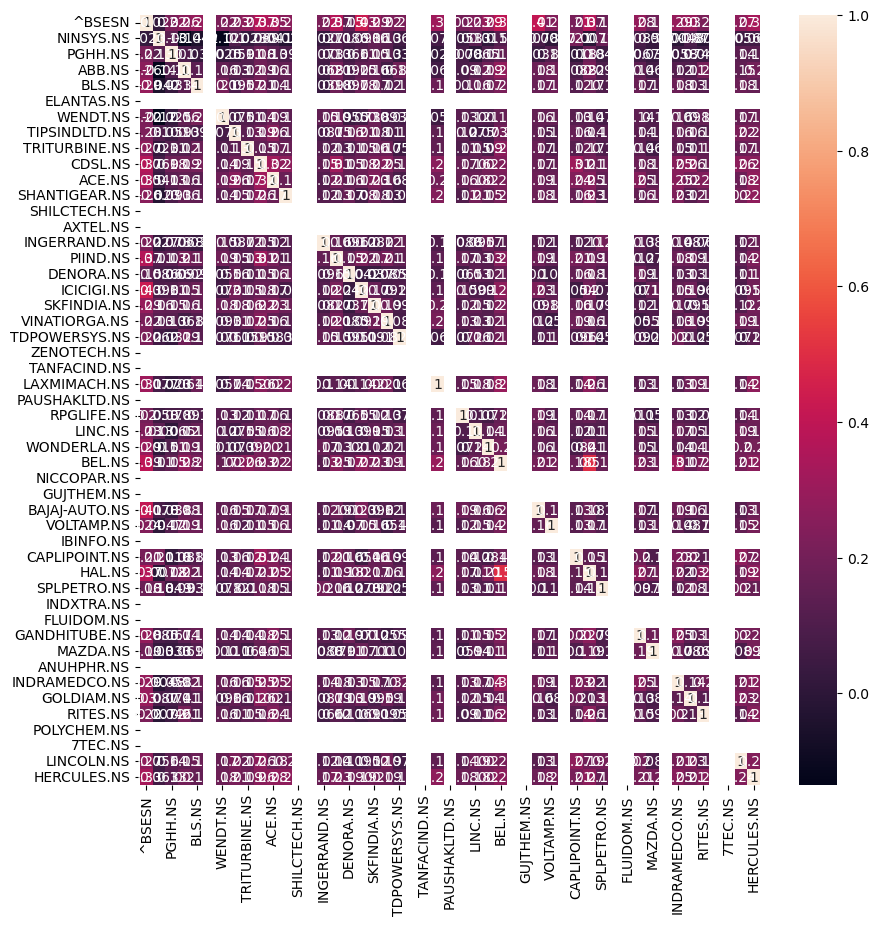

In [28]:
def daily_return(df):
  df_daily_return = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[1:]:
    
    # Loop through each row belonging to the stock
    for j in range(1, len(df)):

      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
    
    # set the value of first row to zero since the previous value is not available
    df_daily_return[i][0] = 0
  
  return df_daily_return

# Get the daily returns 
stocks_daily_return = daily_return(stocks_df)

# Daily Return Correlation
cm = stocks_daily_return.drop(columns = ['Date']).corr()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
plt.figure(figsize=(10, 10))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax);

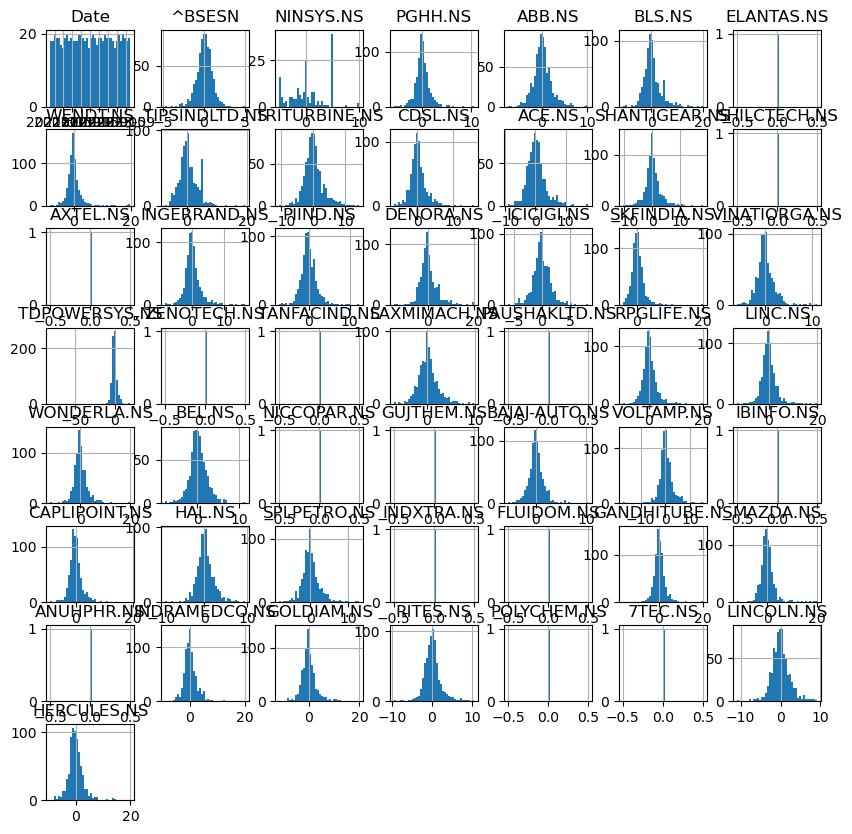

In [29]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean 
# Notice how Tesla Standard deviation is high indicating a more volatile stock
stocks_daily_return.hist(figsize=(10, 10), bins = 40);

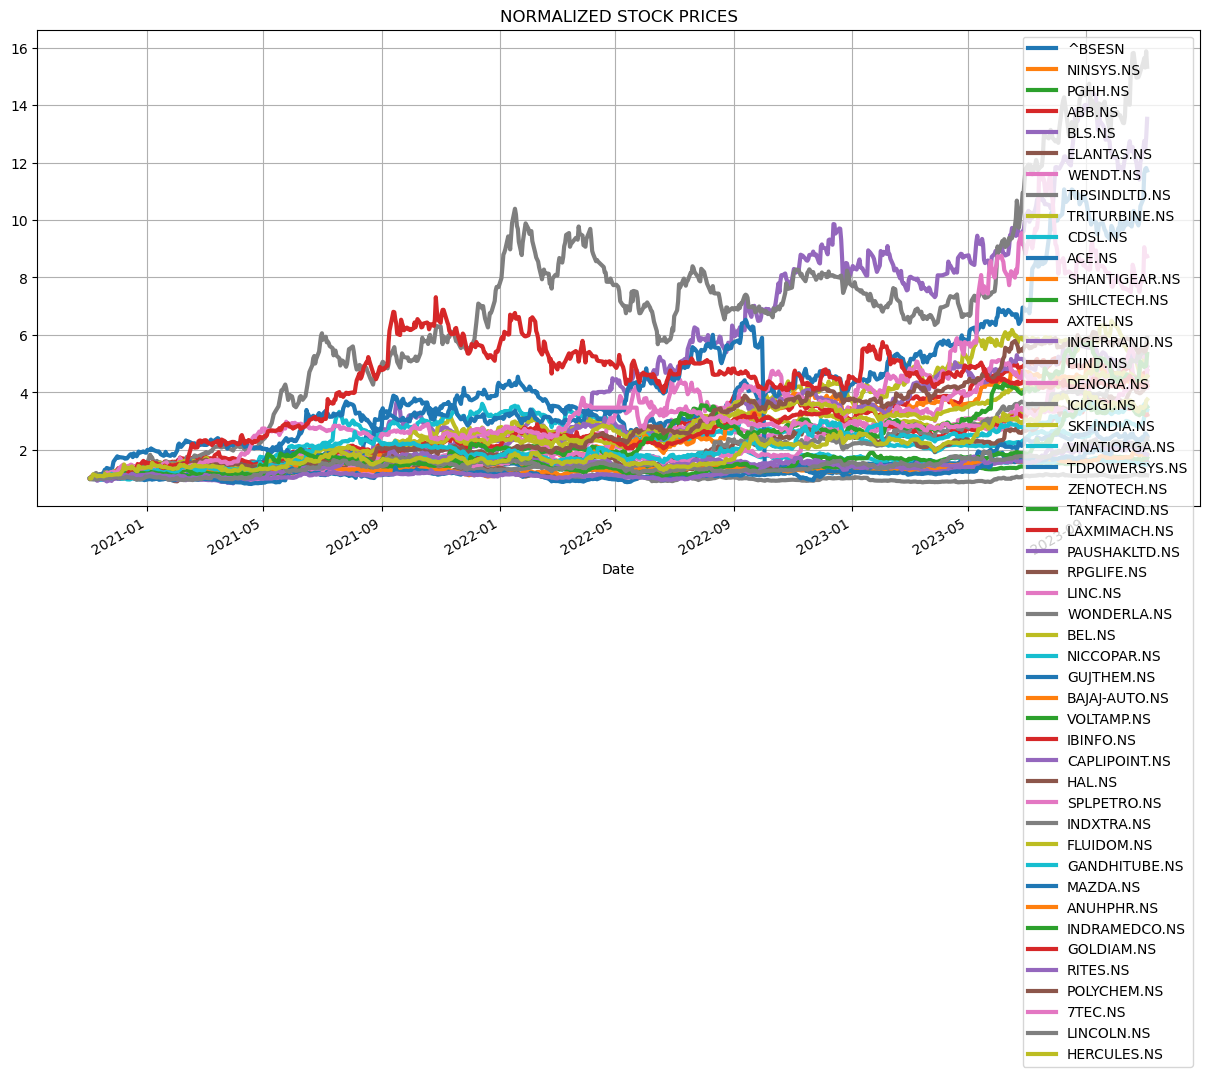

In [30]:
# Function to normalize the prices based on the initial price
# The function simply divides every stock by it's price at the start date (i.e.: Date = 2012-01-12)	
def normalize(df):
  x = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

# Plot normalized data
# Notice the massive gains in Tesla Stock compared to Amazon (second place)
show_plot(normalize(stocks_df), 'NORMALIZED STOCK PRICES')

In [31]:
patterns = {
    'CDL2CROWS':'Two Crows',
    'CDL3BLACKCROWS':'Three Black Crows',
    'CDL3INSIDE':'Three Inside Up/Down',
    'CDL3LINESTRIKE':'Three-Line Strike',
    'CDL3OUTSIDE':'Three Outside Up/Down',
    'CDL3STARSINSOUTH':'Three Stars In The South',
    'CDL3WHITESOLDIERS':'Three Advancing White Soldiers',
    'CDLABANDONEDBABY':'Abandoned Baby',
    'CDLADVANCEBLOCK':'Advance Block',
    'CDLBELTHOLD':'Belt-hold',
    'CDLBREAKAWAY':'Breakaway',
    'CDLCLOSINGMARUBOZU':'Closing Marubozu',
    'CDLCONCEALBABYSWALL':'Concealing Baby Swallow',
    'CDLCOUNTERATTACK':'Counterattack',
    'CDLDARKCLOUDCOVER':'Dark Cloud Cover',
    'CDLDOJI':'Doji',
    'CDLDOJISTAR':'Doji Star',
    'CDLDRAGONFLYDOJI':'Dragonfly Doji',
    'CDLENGULFING':'Engulfing Pattern',
    'CDLEVENINGDOJISTAR':'Evening Doji Star',
    'CDLEVENINGSTAR':'Evening Star',
    'CDLGAPSIDESIDEWHITE':'Up/Down-gap side-by-side white lines',
    'CDLGRAVESTONEDOJI':'Gravestone Doji',
    'CDLHAMMER':'Hammer',
    'CDLHANGINGMAN':'Hanging Man',
    'CDLHARAMI':'Harami Pattern',
    'CDLHARAMICROSS':'Harami Cross Pattern',
    'CDLHIGHWAVE':'High-Wave Candle',
    'CDLHIKKAKE':'Hikkake Pattern',
    'CDLHIKKAKEMOD':'Modified Hikkake Pattern',
    'CDLHOMINGPIGEON':'Homing Pigeon',
    'CDLIDENTICAL3CROWS':'Identical Three Crows',
    'CDLINNECK':'In-Neck Pattern',
    'CDLINVERTEDHAMMER':'Inverted Hammer',
    'CDLKICKING':'Kicking',
    'CDLKICKINGBYLENGTH':'Kicking - bull/bear determined by the longer marubozu',
    'CDLLADDERBOTTOM':'Ladder Bottom',
    'CDLLONGLEGGEDDOJI':'Long Legged Doji',
    'CDLLONGLINE':'Long Line Candle',
    'CDLMARUBOZU':'Marubozu',
    'CDLMATCHINGLOW':'Matching Low',
    'CDLMATHOLD':'Mat Hold',
    'CDLMORNINGDOJISTAR':'Morning Doji Star',
    'CDLMORNINGSTAR':'Morning Star',
    'CDLONNECK':'On-Neck Pattern',
    'CDLPIERCING':'Piercing Pattern',
    'CDLRICKSHAWMAN':'Rickshaw Man',
    'CDLRISEFALL3METHODS':'Rising/Falling Three Methods',
    'CDLSEPARATINGLINES':'Separating Lines',
    'CDLSHOOTINGSTAR':'Shooting Star',
    'CDLSHORTLINE':'Short Line Candle',
    'CDLSPINNINGTOP':'Spinning Top',
    'CDLSTALLEDPATTERN':'Stalled Pattern',
    'CDLSTICKSANDWICH':'Stick Sandwich',
    'CDLTAKURI':'Takuri (Dragonfly Doji with very long lower shadow)',
    'CDLTASUKIGAP':'Tasuki Gap',
    'CDLTHRUSTING':'Thrusting Pattern',
    'CDLTRISTAR':'Tristar Pattern',
    'CDLUNIQUE3RIVER':'Unique 3 River',
    'CDLUPSIDEGAP2CROWS':'Upside Gap Two Crows',
    'CDLXSIDEGAP3METHODS':'Upside/Downside Gap Three Methods'
}

In [32]:
import os, csv
import pandas as pd
import yfinance as yf
import talib

import datetime
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

def candle_trend(patterns,tickers):
    
    data = pd.DataFrame(columns=['Ticker','Candle-Pattern','Definition','Signal'])
    for t in tickers:
        try: 
            df = yf.download(t, period="4y") 
    
        
            for pattern in patterns:
                ta_function = getattr(talib, pattern)
                result = ta_function(df['Open'], df['High'], df['Low'], df['Close'])
                last_pattern = result.tail(1).values[0]
                if last_pattern > 0:
                    data = data.append(pd.Series([t,pattern,patterns[pattern],"BULLISH"],index=data.columns), ignore_index=True)
                
                
                elif last_pattern < 0:
                    data = data.append(pd.Series([t,pattern,patterns[pattern],"BEAR"],index=data.columns), ignore_index=True)
        except:
            continue

    return data
g=candle_trend(patterns,tickers)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ELANTAS.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['SHILCTECH.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AXTEL.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZENOTECH.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TANFACIND.NS']: Exception("%ticker%: Period '4y' is invalid, must be one of ['1mo', '3mo', '6mo', 'ytd', '1y', '2y', '5y', '10y', 'max']")



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['PAUSHAKLTD.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['NICCOPAR.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed


1 Failed download:
['GUJTHEM.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['IBINFO.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['INDXTRA.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed


1 Failed download:
['FLUIDOM.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ANUHPHR.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['POLYCHEM.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed


1 Failed download:
['7TEC.NS']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [33]:
g

Empty DataFrame
Columns: [Ticker, Candle-Pattern, Definition, Signal]
Index: []

In [34]:
g.Ticker.unique()

array([], dtype=object)

In [35]:
g['Candle-Pattern'].unique()

array([], dtype=object)

In [36]:
df2.head(20)

index         Ticker   Cov_mar  Market_var      Beta  Volatility%  \
0       0      NINSYS.NS  0.001265    0.022562  0.056087    54.282401   
1       6  TIPSINDLTD.NS  0.016306    0.022562  0.722682    47.095419   
2       3         BLS.NS  0.023498    0.022562  1.041449    53.179395   
3       9         ACE.NS  0.025754    0.022562  1.141444    48.805588   
4      15      DENORA.NS  0.014204    0.022562  0.629560    61.076695   
5      26    WONDERLA.NS  0.018621    0.022562  0.825294    41.333032   
6       7  TRITURBINE.NS  0.019362    0.022562  0.858170    46.836749   
7      34         HAL.NS  0.017747    0.022562  0.786588    31.810778   
8      31     VOLTAMP.NS  0.015068    0.022562  0.667818    41.733555   
9      13   INGERRAND.NS  0.013124    0.022562  0.581669    39.086314   
10      2         ABB.NS  0.012619    0.022562  0.559271    31.871736   
11     25        LINC.NS  0.017517    0.022562  0.776363    48.753455   
12     27         BEL.NS  0.019271    0.022562  0.854112    32.159484   
13     10  SHANTIGEAR.NS  0.017597    0.022562  0.779916    44.439397   
14     24     RPGLIFE.NS  0.013283    0.022562  0.588709    42.701393   
15     35    SPLPETRO.NS  0.010403    0.022562  0.461073    37.907953   
16     42     GOLDIAM.NS  0.022771    0.022562  1.009233    49.613307   
17      5       WENDT.NS  0.014009    0.022562  0.620901    40.441553   
18     47    HERCULES.NS  0.023932    0.022562  1.060696    46.429916   
19     41  INDRAMEDCO.NS  0.017353    0.022562  0.769091    39.269168   

       Return%          CV  Sharp Ratio        CAGR     MAXDD%  Value at Risk  
0   114.663251   47.340713     2.020236   30.400263  33.844305 -296228.950970  
1    92.724284   50.790815     1.862692  152.437843  45.392485 -184359.331254  
2    88.449875   60.123766     1.569214  141.888890  38.641955  -94611.459009  
3    83.595739   58.382865     1.610384  130.442752  36.268873 -104423.561490  
4    73.601026   82.983483     1.123195  108.552300  35.664564   11461.569261  
5    60.381111   68.453580     1.339875   82.759053  28.015302  -40952.087343  
6    59.263237   79.031708     1.158561   80.730132  31.684732   -8825.550605  
7    58.837986   54.065036     1.692445   79.964237  18.221426  -95223.524226  
8    56.856343   73.401757     1.242558   76.437796  31.442913  -25585.000158  
9    53.850239   72.583361     1.249804   71.219749  24.483418  -27497.696845  
10   52.916896   60.229791     1.503429   69.631246  21.263625  -64092.140505  
11   51.869296   93.992898     0.961353   67.865831  29.308499   18277.649642  
12   51.547204   62.388417     1.447387   67.326744  22.007849  -55869.664695  
13   51.419810   86.424663     1.044564   67.114002  28.747176    3347.342747  
14   50.021985   85.365251     1.054345   64.797392  35.861252     915.158384  
15   49.255405   76.962016     1.167444   63.540606  32.164720  -17465.053657  
16   48.886646  101.486421     0.884574   62.939454  45.219532   28533.174363  
17   46.965699   86.108701     1.037688   62.238070  20.658482     500.522332  
18   44.875706  103.463367     0.858836   56.541831  35.714285   27447.189225  
19   42.718938   91.924495     0.960523   52.775272  46.957404    8935.132104

In [37]:
df2[(df2['CAGR']>15 ) & (df2['Return%']>15)]

index         Ticker   Cov_mar  Market_var      Beta  Volatility%  \
0       0      NINSYS.NS  0.001265    0.022562  0.056087    54.282401   
1       6  TIPSINDLTD.NS  0.016306    0.022562  0.722682    47.095419   
2       3         BLS.NS  0.023498    0.022562  1.041449    53.179395   
3       9         ACE.NS  0.025754    0.022562  1.141444    48.805588   
4      15      DENORA.NS  0.014204    0.022562  0.629560    61.076695   
5      26    WONDERLA.NS  0.018621    0.022562  0.825294    41.333032   
6       7  TRITURBINE.NS  0.019362    0.022562  0.858170    46.836749   
7      34         HAL.NS  0.017747    0.022562  0.786588    31.810778   
8      31     VOLTAMP.NS  0.015068    0.022562  0.667818    41.733555   
9      13   INGERRAND.NS  0.013124    0.022562  0.581669    39.086314   
10      2         ABB.NS  0.012619    0.022562  0.559271    31.871736   
11     25        LINC.NS  0.017517    0.022562  0.776363    48.753455   
12     27         BEL.NS  0.019271    0.022562  0.854112    32.159484   
13     10  SHANTIGEAR.NS  0.017597    0.022562  0.779916    44.439397   
14     24     RPGLIFE.NS  0.013283    0.022562  0.588709    42.701393   
15     35    SPLPETRO.NS  0.010403    0.022562  0.461073    37.907953   
16     42     GOLDIAM.NS  0.022771    0.022562  1.009233    49.613307   
17      5       WENDT.NS  0.014009    0.022562  0.620901    40.441553   
18     47    HERCULES.NS  0.023932    0.022562  1.060696    46.429916   
19     41  INDRAMEDCO.NS  0.017353    0.022562  0.769091    39.269168   
20     38  GANDHITUBE.NS  0.018688    0.022562  0.828285    43.351261   
21      8        CDSL.NS  0.019809    0.022562  0.877943    35.100154   
22     22   LAXMIMACH.NS  0.015696    0.022562  0.695649    33.069115   
23     17    SKFINDIA.NS  0.013073    0.022562  0.579407    29.592233   
24     39       MAZDA.NS  0.013209    0.022562  0.585428    44.427095   
25     46     LINCOLN.NS  0.015163    0.022562  0.672041    36.916559   
26     19  TDPOWERSYS.NS  0.026604    0.022562  1.179121   108.524869   
27     33  CAPLIPOINT.NS  0.012310    0.022562  0.545613    37.904928   
28     30  BAJAJ-AUTO.NS  0.014449    0.022562  0.640401    23.252563   
29     43       RITES.NS  0.011213    0.022562  0.496987    32.934723   
30      1        PGHH.NS  0.007386    0.022562  0.327378    22.425234   
31     14       PIIND.NS  0.017393    0.022562  0.770897    31.156091   

       Return%          CV  Sharp Ratio        CAGR     MAXDD%  Value at Risk  
0   114.663251   47.340713     2.020236   30.400263  33.844305 -296228.950970  
1    92.724284   50.790815     1.862692  152.437843  45.392485 -184359.331254  
2    88.449875   60.123766     1.569214  141.888890  38.641955  -94611.459009  
3    83.595739   58.382865     1.610384  130.442752  36.268873 -104423.561490  
4    73.601026   82.983483     1.123195  108.552300  35.664564   11461.569261  
5    60.381111   68.453580     1.339875   82.759053  28.015302  -40952.087343  
6    59.263237   79.031708     1.158561   80.730132  31.684732   -8825.550605  
7    58.837986   54.065036     1.692445   79.964237  18.221426  -95223.524226  
8    56.856343   73.401757     1.242558   76.437796  31.442913  -25585.000158  
9    53.850239   72.583361     1.249804   71.219749  24.483418  -27497.696845  
10   52.916896   60.229791     1.503429   69.631246  21.263625  -64092.140505  
11   51.869296   93.992898     0.961353   67.865831  29.308499   18277.649642  
12   51.547204   62.388417     1.447387   67.326744  22.007849  -55869.664695  
13   51.419810   86.424663     1.044564   67.114002  28.747176    3347.342747  
14   50.021985   85.365251     1.054345   64.797392  35.861252     915.158384  
15   49.255405   76.962016     1.167444   63.540606  32.164720  -17465.053657  
16   48.886646  101.486421     0.884574   62.939454  45.219532   28533.174363  
17   46.965699   86.108701     1.037688   62.238070  20.658482     500.522332  
18   44.875706  103.463367     0.858836   56.541831  35.714285   27447.189

In [38]:
df2[(df2['CAGR']>15 ) & (df2['Return%']>15) & (df2['Volatility%']<50)]

index         Ticker   Cov_mar  Market_var      Beta  Volatility%  \
1       6  TIPSINDLTD.NS  0.016306    0.022562  0.722682    47.095419   
3       9         ACE.NS  0.025754    0.022562  1.141444    48.805588   
5      26    WONDERLA.NS  0.018621    0.022562  0.825294    41.333032   
6       7  TRITURBINE.NS  0.019362    0.022562  0.858170    46.836749   
7      34         HAL.NS  0.017747    0.022562  0.786588    31.810778   
8      31     VOLTAMP.NS  0.015068    0.022562  0.667818    41.733555   
9      13   INGERRAND.NS  0.013124    0.022562  0.581669    39.086314   
10      2         ABB.NS  0.012619    0.022562  0.559271    31.871736   
11     25        LINC.NS  0.017517    0.022562  0.776363    48.753455   
12     27         BEL.NS  0.019271    0.022562  0.854112    32.159484   
13     10  SHANTIGEAR.NS  0.017597    0.022562  0.779916    44.439397   
14     24     RPGLIFE.NS  0.013283    0.022562  0.588709    42.701393   
15     35    SPLPETRO.NS  0.010403    0.022562  0.461073    37.907953   
16     42     GOLDIAM.NS  0.022771    0.022562  1.009233    49.613307   
17      5       WENDT.NS  0.014009    0.022562  0.620901    40.441553   
18     47    HERCULES.NS  0.023932    0.022562  1.060696    46.429916   
19     41  INDRAMEDCO.NS  0.017353    0.022562  0.769091    39.269168   
20     38  GANDHITUBE.NS  0.018688    0.022562  0.828285    43.351261   
21      8        CDSL.NS  0.019809    0.022562  0.877943    35.100154   
22     22   LAXMIMACH.NS  0.015696    0.022562  0.695649    33.069115   
23     17    SKFINDIA.NS  0.013073    0.022562  0.579407    29.592233   
24     39       MAZDA.NS  0.013209    0.022562  0.585428    44.427095   
25     46     LINCOLN.NS  0.015163    0.022562  0.672041    36.916559   
27     33  CAPLIPOINT.NS  0.012310    0.022562  0.545613    37.904928   
28     30  BAJAJ-AUTO.NS  0.014449    0.022562  0.640401    23.252563   
29     43       RITES.NS  0.011213    0.022562  0.496987    32.934723   
30      1        PGHH.NS  0.007386    0.022562  0.327378    22.425234   
31     14       PIIND.NS  0.017393    0.022562  0.770897    31.156091   

      Return%          CV  Sharp Ratio        CAGR     MAXDD%  Value at Risk  
1   92.724284   50.790815     1.862692  152.437843  45.392485 -184359.331254  
3   83.595739   58.382865     1.610384  130.442752  36.268873 -104423.561490  
5   60.381111   68.453580     1.339875   82.759053  28.015302  -40952.087343  
6   59.263237   79.031708     1.158561   80.730132  31.684732   -8825.550605  
7   58.837986   54.065036     1.692445   79.964237  18.221426  -95223.524226  
8   56.856343   73.401757     1.242558   76.437796  31.442913  -25585.000158  
9   53.850239   72.583361     1.249804   71.219749  24.483418  -27497.696845  
10  52.916896   60.229791     1.503429   69.631246  21.263625  -64092.140505  
11  51.869296   93.992898     0.961353   67.865831  29.308499   18277.649642  
12  51.547204   62.388417     1.447387   67.326744  22.007849  -55869.664695  
13  51.419810   86.424663     1.044564   67.114002  28.747176    3347.342747  
14  50.021985   85.365251     1.054345   64.797392  35.861252     915.158384  
15  49.255405   76.962016     1.167444   63.540606  32.164720  -17465.053657  
16  48.886646  101.486421     0.884574   62.939454  45.219532   28533.174363  
17  46.965699   86.108701     1.037688   62.238070  20.658482     500.522332  
18  44.875706  103.463367     0.858836   56.541831  35.714285   27447.189225  
19  42.718938   91.924495     0.960523   52.775272  46.957404    8935.132104  
20  42.493750  102.017970     0.864883   52.862032  43.026265   22853.950231  
21  41.257988   85.074807     1.032987   50.987156  46.855873   -3891.506962  
22  40.055899   82.557415     1.060080   48.631162  29.229512   -7182.120717  
23  39.717064   74.507606     1.173182   48.681476  24.793149  -21579.112150  
24  30.926002  143.656121     0.583563   36.184962  37.146346   46508.498074  
25  29.916481  123.398734     0.674941   34.648247  35.756836   30786

In [39]:
np.corrcoef(df1['CV'], df1['Value at Risk'])[0][1]

0.6157090843775148

In [40]:
def t_stat_corr(df, x, y):
    """Returns the t-statistic for the correlation between 2 variables"""
    corr_xy = np.corrcoef(df[x], df[y])[0][1]
    n = len(df)
    
    t_stat = (corr_xy * np.sqrt(n - 2)) / np.sqrt(1 - corr_xy ** 2)
    
    return t_stat

In [41]:
# H1
t_stat_corr(df=df1, y='Value at Risk', x='CV')

4.350556025664306

In [42]:
t_stat_corr(df=df1, y='Return%', x='CV')

-4.248123191837915

In [43]:
t_stat_corr(df=df1, y='Volatility%', x='Return%')

1.7824442899140367

In [44]:
t_stat_corr(df=df1, y='Volatility%', x='CV')

3.0450324170836875

In [45]:
t_stat_corr(df=df1, y='Volatility%', x='MAXDD%')

7.6110524037636225

In [46]:

t_stat_corr(df=df1, y='Return%', x='MAXDD%')

0.11448823568211555

In [47]:
df2[(df2['CAGR']>20 ) & (df2['Return%']>20) & (df2['Volatility%']<50)]

index         Ticker   Cov_mar  Market_var      Beta  Volatility%  \
1       6  TIPSINDLTD.NS  0.016306    0.022562  0.722682    47.095419   
3       9         ACE.NS  0.025754    0.022562  1.141444    48.805588   
5      26    WONDERLA.NS  0.018621    0.022562  0.825294    41.333032   
6       7  TRITURBINE.NS  0.019362    0.022562  0.858170    46.836749   
7      34         HAL.NS  0.017747    0.022562  0.786588    31.810778   
8      31     VOLTAMP.NS  0.015068    0.022562  0.667818    41.733555   
9      13   INGERRAND.NS  0.013124    0.022562  0.581669    39.086314   
10      2         ABB.NS  0.012619    0.022562  0.559271    31.871736   
11     25        LINC.NS  0.017517    0.022562  0.776363    48.753455   
12     27         BEL.NS  0.019271    0.022562  0.854112    32.159484   
13     10  SHANTIGEAR.NS  0.017597    0.022562  0.779916    44.439397   
14     24     RPGLIFE.NS  0.013283    0.022562  0.588709    42.701393   
15     35    SPLPETRO.NS  0.010403    0.022562  0.461073    37.907953   
16     42     GOLDIAM.NS  0.022771    0.022562  1.009233    49.613307   
17      5       WENDT.NS  0.014009    0.022562  0.620901    40.441553   
18     47    HERCULES.NS  0.023932    0.022562  1.060696    46.429916   
19     41  INDRAMEDCO.NS  0.017353    0.022562  0.769091    39.269168   
20     38  GANDHITUBE.NS  0.018688    0.022562  0.828285    43.351261   
21      8        CDSL.NS  0.019809    0.022562  0.877943    35.100154   
22     22   LAXMIMACH.NS  0.015696    0.022562  0.695649    33.069115   
23     17    SKFINDIA.NS  0.013073    0.022562  0.579407    29.592233   
24     39       MAZDA.NS  0.013209    0.022562  0.585428    44.427095   
25     46     LINCOLN.NS  0.015163    0.022562  0.672041    36.916559   
27     33  CAPLIPOINT.NS  0.012310    0.022562  0.545613    37.904928   
28     30  BAJAJ-AUTO.NS  0.014449    0.022562  0.640401    23.252563   
29     43       RITES.NS  0.011213    0.022562  0.496987    32.934723   

      Return%          CV  Sharp Ratio        CAGR     MAXDD%  Value at Risk  
1   92.724284   50.790815     1.862692  152.437843  45.392485 -184359.331254  
3   83.595739   58.382865     1.610384  130.442752  36.268873 -104423.561490  
5   60.381111   68.453580     1.339875   82.759053  28.015302  -40952.087343  
6   59.263237   79.031708     1.158561   80.730132  31.684732   -8825.550605  
7   58.837986   54.065036     1.692445   79.964237  18.221426  -95223.524226  
8   56.856343   73.401757     1.242558   76.437796  31.442913  -25585.000158  
9   53.850239   72.583361     1.249804   71.219749  24.483418  -27497.696845  
10  52.916896   60.229791     1.503429   69.631246  21.263625  -64092.140505  
11  51.869296   93.992898     0.961353   67.865831  29.308499   18277.649642  
12  51.547204   62.388417     1.447387   67.326744  22.007849  -55869.664695  
13  51.419810   86.424663     1.044564   67.114002  28.747176    3347.342747  
14  50.021985   85.365251     1.054345   64.797392  35.861252     915.158384  
15  49.255405   76.962016     1.167444   63.540606  32.164720  -17465.053657  
16  48.886646  101.486421     0.884574   62.939454  45.219532   28533.174363  
17  46.965699   86.108701     1.037688   62.238070  20.658482     500.522332  
18  44.875706  103.463367     0.858836   56.541831  35.714285   27447.189225  
19  42.718938   91.924495     0.960523   52.775272  46.957404    8935.132104  
20  42.493750  102.017970     0.864883   52.862032  43.026265   22853.950231  
21  41.257988   85.074807     1.032987   50.987156  46.855873   -3891.506962  
22  40.055899   82.557415     1.060080   48.631162  29.229512   -7182.120717  
23  39.717064   74.507606     1.173182   48.681476  24.793149  -21579.112150  
24  30.926002  143.656121     0.583563   36.184962  37.146346   46508.498074  
25  29.916481  123.398734     0.674941   34.648247  35.756836   30786.388408  
27  26.131603  145.053973     0.557490   29.818135  38.896441   39776.825290  
28  20.744626  112.089571     0.677114   23.018807  27.70

In [48]:
df3 = df2[(df2['CAGR']>20 ) & (df2['Return%']>20) & (df2['Volatility%']<50) & (df2['Value at Risk']<52000)]
df3

index         Ticker   Cov_mar  Market_var      Beta  Volatility%  \
1       6  TIPSINDLTD.NS  0.016306    0.022562  0.722682    47.095419   
3       9         ACE.NS  0.025754    0.022562  1.141444    48.805588   
5      26    WONDERLA.NS  0.018621    0.022562  0.825294    41.333032   
6       7  TRITURBINE.NS  0.019362    0.022562  0.858170    46.836749   
7      34         HAL.NS  0.017747    0.022562  0.786588    31.810778   
8      31     VOLTAMP.NS  0.015068    0.022562  0.667818    41.733555   
9      13   INGERRAND.NS  0.013124    0.022562  0.581669    39.086314   
10      2         ABB.NS  0.012619    0.022562  0.559271    31.871736   
11     25        LINC.NS  0.017517    0.022562  0.776363    48.753455   
12     27         BEL.NS  0.019271    0.022562  0.854112    32.159484   
13     10  SHANTIGEAR.NS  0.017597    0.022562  0.779916    44.439397   
14     24     RPGLIFE.NS  0.013283    0.022562  0.588709    42.701393   
15     35    SPLPETRO.NS  0.010403    0.022562  0.461073    37.907953   
16     42     GOLDIAM.NS  0.022771    0.022562  1.009233    49.613307   
17      5       WENDT.NS  0.014009    0.022562  0.620901    40.441553   
18     47    HERCULES.NS  0.023932    0.022562  1.060696    46.429916   
19     41  INDRAMEDCO.NS  0.017353    0.022562  0.769091    39.269168   
20     38  GANDHITUBE.NS  0.018688    0.022562  0.828285    43.351261   
21      8        CDSL.NS  0.019809    0.022562  0.877943    35.100154   
22     22   LAXMIMACH.NS  0.015696    0.022562  0.695649    33.069115   
23     17    SKFINDIA.NS  0.013073    0.022562  0.579407    29.592233   
24     39       MAZDA.NS  0.013209    0.022562  0.585428    44.427095   
25     46     LINCOLN.NS  0.015163    0.022562  0.672041    36.916559   
27     33  CAPLIPOINT.NS  0.012310    0.022562  0.545613    37.904928   
28     30  BAJAJ-AUTO.NS  0.014449    0.022562  0.640401    23.252563   
29     43       RITES.NS  0.011213    0.022562  0.496987    32.934723   

      Return%          CV  Sharp Ratio        CAGR     MAXDD%  Value at Risk  
1   92.724284   50.790815     1.862692  152.437843  45.392485 -184359.331254  
3   83.595739   58.382865     1.610384  130.442752  36.268873 -104423.561490  
5   60.381111   68.453580     1.339875   82.759053  28.015302  -40952.087343  
6   59.263237   79.031708     1.158561   80.730132  31.684732   -8825.550605  
7   58.837986   54.065036     1.692445   79.964237  18.221426  -95223.524226  
8   56.856343   73.401757     1.242558   76.437796  31.442913  -25585.000158  
9   53.850239   72.583361     1.249804   71.219749  24.483418  -27497.696845  
10  52.916896   60.229791     1.503429   69.631246  21.263625  -64092.140505  
11  51.869296   93.992898     0.961353   67.865831  29.308499   18277.649642  
12  51.547204   62.388417     1.447387   67.326744  22.007849  -55869.664695  
13  51.419810   86.424663     1.044564   67.114002  28.747176    3347.342747  
14  50.021985   85.365251     1.054345   64.797392  35.861252     915.158384  
15  49.255405   76.962016     1.167444   63.540606  32.164720  -17465.053657  
16  48.886646  101.486421     0.884574   62.939454  45.219532   28533.174363  
17  46.965699   86.108701     1.037688   62.238070  20.658482     500.522332  
18  44.875706  103.463367     0.858836   56.541831  35.714285   27447.189225  
19  42.718938   91.924495     0.960523   52.775272  46.957404    8935.132104  
20  42.493750  102.017970     0.864883   52.862032  43.026265   22853.950231  
21  41.257988   85.074807     1.032987   50.987156  46.855873   -3891.506962  
22  40.055899   82.557415     1.060080   48.631162  29.229512   -7182.120717  
23  39.717064   74.507606     1.173182   48.681476  24.793149  -21579.112150  
24  30.926002  143.656121     0.583563   36.184962  37.146346   46508.498074  
25  29.916481  123.398734     0.674941   34.648247  35.756836   30786.388408  
27  26.131603  145.053973     0.557490   29.818135  38.896441   39776.825290  
28  20.744626  112.089571     0.677114   23.018807  27.70

In [49]:
df3.reset_index(inplace = True)

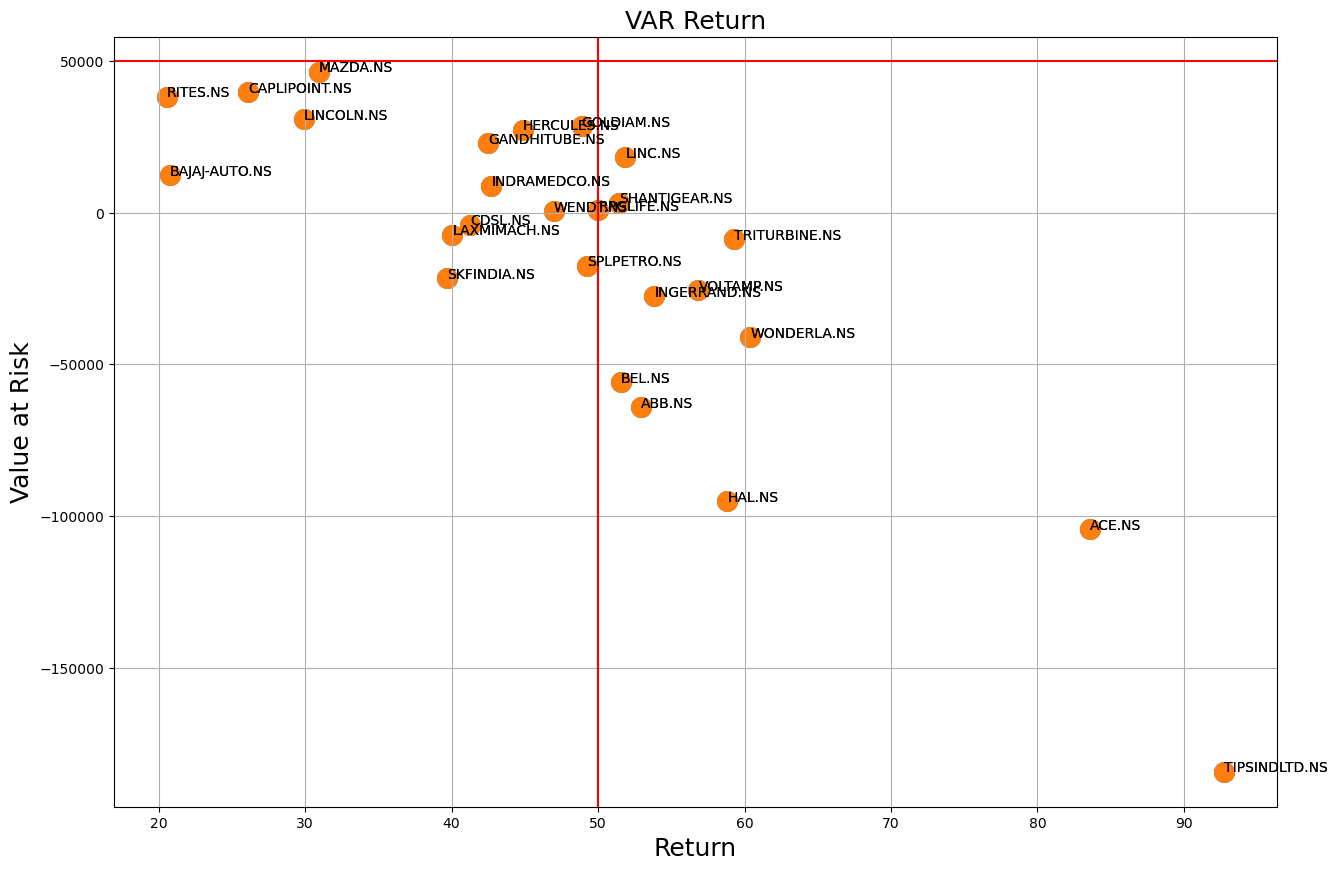

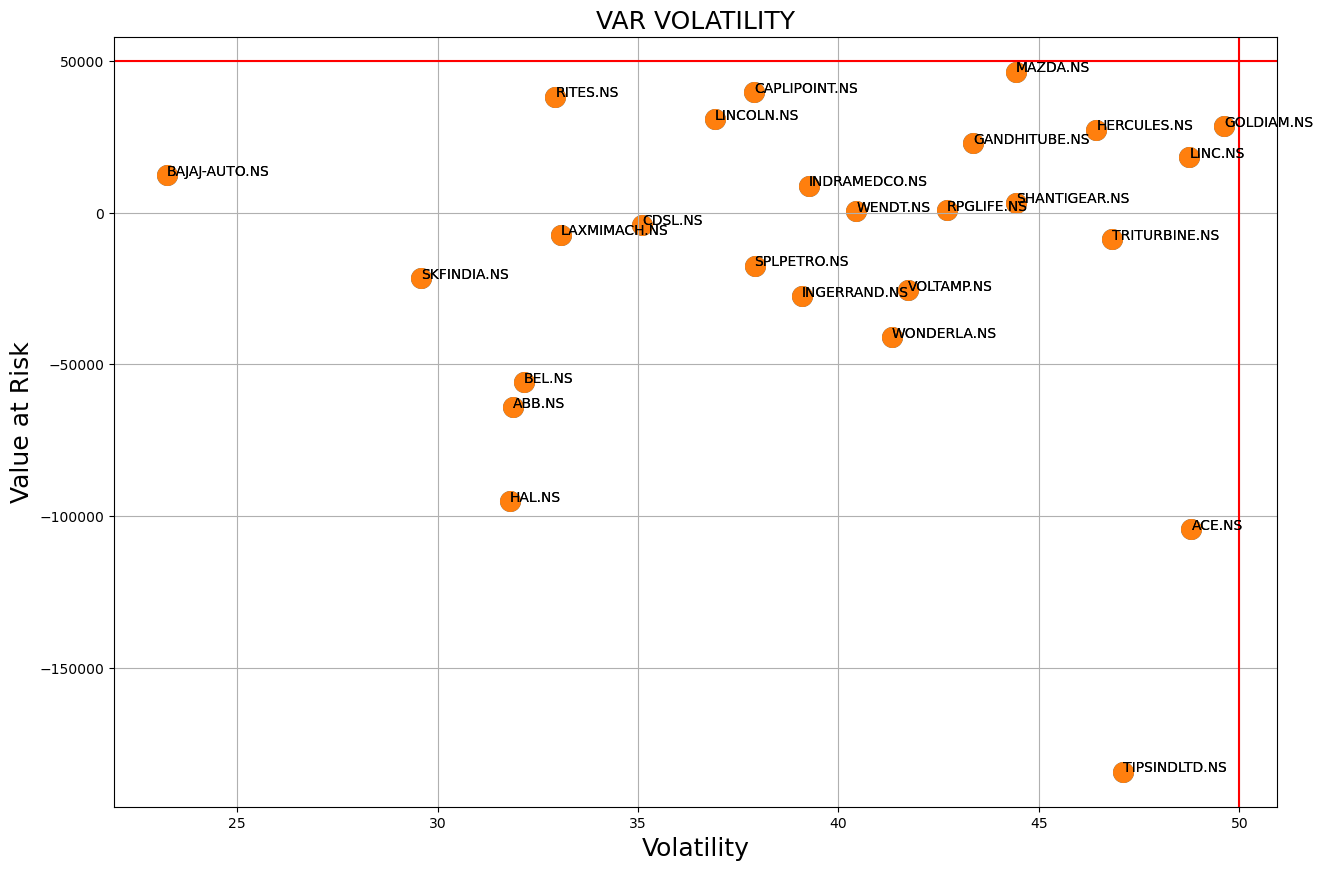

In [50]:
plt.figure(figsize=[15,10])
x= df3['Return%']
y = df3['Value at Risk']
annotations = df3["Ticker"]
plt.grid(True)
plt.title('VAR Return', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

plt.figure(figsize=[15,10])
x= df3['Volatility%']
y = df3['Value at Risk']
annotations = df3["Ticker"]
plt.grid(True)
plt.title('VAR VOLATILITY', fontsize=18, color='black')
plt.xlabel("Volatility",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.scatter(x, y,s=200 )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()

In [51]:
len(df3)

26

In [52]:
df4 = df3.sort_values(by='Return%', ascending=False)

In [53]:
df4.head(40)

level_0  index         Ticker   Cov_mar  Market_var      Beta  \
0         1      6  TIPSINDLTD.NS  0.016306    0.022562  0.722682   
1         3      9         ACE.NS  0.025754    0.022562  1.141444   
2         5     26    WONDERLA.NS  0.018621    0.022562  0.825294   
3         6      7  TRITURBINE.NS  0.019362    0.022562  0.858170   
4         7     34         HAL.NS  0.017747    0.022562  0.786588   
5         8     31     VOLTAMP.NS  0.015068    0.022562  0.667818   
6         9     13   INGERRAND.NS  0.013124    0.022562  0.581669   
7        10      2         ABB.NS  0.012619    0.022562  0.559271   
8        11     25        LINC.NS  0.017517    0.022562  0.776363   
9        12     27         BEL.NS  0.019271    0.022562  0.854112   
10       13     10  SHANTIGEAR.NS  0.017597    0.022562  0.779916   
11       14     24     RPGLIFE.NS  0.013283    0.022562  0.588709   
12       15     35    SPLPETRO.NS  0.010403    0.022562  0.461073   
13       16     42     GOLDIAM.NS  0.022771    0.022562  1.009233   
14       17      5       WENDT.NS  0.014009    0.022562  0.620901   
15       18     47    HERCULES.NS  0.023932    0.022562  1.060696   
16       19     41  INDRAMEDCO.NS  0.017353    0.022562  0.769091   
17       20     38  GANDHITUBE.NS  0.018688    0.022562  0.828285   
18       21      8        CDSL.NS  0.019809    0.022562  0.877943   
19       22     22   LAXMIMACH.NS  0.015696    0.022562  0.695649   
20       23     17    SKFINDIA.NS  0.013073    0.022562  0.579407   
21       24     39       MAZDA.NS  0.013209    0.022562  0.585428   
22       25     46     LINCOLN.NS  0.015163    0.022562  0.672041   
23       27     33  CAPLIPOINT.NS  0.012310    0.022562  0.545613   
24       28     30  BAJAJ-AUTO.NS  0.014449    0.022562  0.640401   
25       29     43       RITES.NS  0.011213    0.022562  0.496987   

    Volatility%    Return%          CV  Sharp Ratio        CAGR     MAXDD%  \
0     47.095419  92.724284   50.790815     1.862692  152.437843  45.392485   
1     48.805588  83.595739   58.382865     1.610384  130.442752  36.268873   
2     41.333032  60.381111   68.453580     1.339875   82.759053  28.015302   
3     46.836749  59.263237   79.031708     1.158561   80.730132  31.684732   
4     31.810778  58.837986   54.065036     1.692445   79.964237  18.221426   
5     41.733555  56.856343   73.401757     1.242558   76.437796  31.442913   
6     39.086314  53.850239   72.583361     1.249804   71.219749  24.483418   
7     31.871736  52.916896   60.229791     1.503429   69.631246  21.263625   
8     48.753455  51.869296   93.992898     0.961353   67.865831  29.308499   
9     32.159484  51.547204   62.388417     1.447387   67.326744  22.007849   
10    44.439397  51.419810   86.424663     1.044564   67.114002  28.747176   
11    42.701393  50.021985   85.365251     1.054345   64.797392  35.861252   
12    37.907953  49.255405   76.962016     1.167444   63.540606  32.164720   
13    49.613307  48.886646  101.486421     0.884574   62.939454  45.219532   
14    40.441553  46.965699   86.108701     1.037688   62.238070  20.658482   
15    46.429916  44.875706  103.463367     0.858836   56.541831  35.714285   
16    39.269168  42.718938   91.924495     0.960523   52.775272  46.957404   
17    43.351261  42.493750  102.017970     0.864883   52.862032  43.026265   
18    35.100154  41.257988   85.074807     1.032987   50.987156  46.855873   
19    33.069115  40.055899   82.557415     1.060080   48.631162  29.229512   
20    29.592233  39.717064   74.507606     1.173182   48.681476  24.793149   
21    44.427095  30.926002  143.656121     0.583563   36.184962  37.146346   
22    36.916559  29.916481  123.398734     0.674941   34.648247  35.756836   
23    37.904928  26.131603  145.053973     0.557490   29.818135  38.896441   
24    23.252563  20.744626  112.089571     0.677114   23.018807  27.702819   
25    32.934723  20.571560  160.098321     0.472801   22.806374  26.229774   

    Value at Risk  
0  -184359.33

In [54]:
df4.tail(30)

level_0  index         Ticker   Cov_mar  Market_var      Beta  \
0         1      6  TIPSINDLTD.NS  0.016306    0.022562  0.722682   
1         3      9         ACE.NS  0.025754    0.022562  1.141444   
2         5     26    WONDERLA.NS  0.018621    0.022562  0.825294   
3         6      7  TRITURBINE.NS  0.019362    0.022562  0.858170   
4         7     34         HAL.NS  0.017747    0.022562  0.786588   
5         8     31     VOLTAMP.NS  0.015068    0.022562  0.667818   
6         9     13   INGERRAND.NS  0.013124    0.022562  0.581669   
7        10      2         ABB.NS  0.012619    0.022562  0.559271   
8        11     25        LINC.NS  0.017517    0.022562  0.776363   
9        12     27         BEL.NS  0.019271    0.022562  0.854112   
10       13     10  SHANTIGEAR.NS  0.017597    0.022562  0.779916   
11       14     24     RPGLIFE.NS  0.013283    0.022562  0.588709   
12       15     35    SPLPETRO.NS  0.010403    0.022562  0.461073   
13       16     42     GOLDIAM.NS  0.022771    0.022562  1.009233   
14       17      5       WENDT.NS  0.014009    0.022562  0.620901   
15       18     47    HERCULES.NS  0.023932    0.022562  1.060696   
16       19     41  INDRAMEDCO.NS  0.017353    0.022562  0.769091   
17       20     38  GANDHITUBE.NS  0.018688    0.022562  0.828285   
18       21      8        CDSL.NS  0.019809    0.022562  0.877943   
19       22     22   LAXMIMACH.NS  0.015696    0.022562  0.695649   
20       23     17    SKFINDIA.NS  0.013073    0.022562  0.579407   
21       24     39       MAZDA.NS  0.013209    0.022562  0.585428   
22       25     46     LINCOLN.NS  0.015163    0.022562  0.672041   
23       27     33  CAPLIPOINT.NS  0.012310    0.022562  0.545613   
24       28     30  BAJAJ-AUTO.NS  0.014449    0.022562  0.640401   
25       29     43       RITES.NS  0.011213    0.022562  0.496987   

    Volatility%    Return%          CV  Sharp Ratio        CAGR     MAXDD%  \
0     47.095419  92.724284   50.790815     1.862692  152.437843  45.392485   
1     48.805588  83.595739   58.382865     1.610384  130.442752  36.268873   
2     41.333032  60.381111   68.453580     1.339875   82.759053  28.015302   
3     46.836749  59.263237   79.031708     1.158561   80.730132  31.684732   
4     31.810778  58.837986   54.065036     1.692445   79.964237  18.221426   
5     41.733555  56.856343   73.401757     1.242558   76.437796  31.442913   
6     39.086314  53.850239   72.583361     1.249804   71.219749  24.483418   
7     31.871736  52.916896   60.229791     1.503429   69.631246  21.263625   
8     48.753455  51.869296   93.992898     0.961353   67.865831  29.308499   
9     32.159484  51.547204   62.388417     1.447387   67.326744  22.007849   
10    44.439397  51.419810   86.424663     1.044564   67.114002  28.747176   
11    42.701393  50.021985   85.365251     1.054345   64.797392  35.861252   
12    37.907953  49.255405   76.962016     1.167444   63.540606  32.164720   
13    49.613307  48.886646  101.486421     0.884574   62.939454  45.219532   
14    40.441553  46.965699   86.108701     1.037688   62.238070  20.658482   
15    46.429916  44.875706  103.463367     0.858836   56.541831  35.714285   
16    39.269168  42.718938   91.924495     0.960523   52.775272  46.957404   
17    43.351261  42.493750  102.017970     0.864883   52.862032  43.026265   
18    35.100154  41.257988   85.074807     1.032987   50.987156  46.855873   
19    33.069115  40.055899   82.557415     1.060080   48.631162  29.229512   
20    29.592233  39.717064   74.507606     1.173182   48.681476  24.793149   
21    44.427095  30.926002  143.656121     0.583563   36.184962  37.146346   
22    36.916559  29.916481  123.398734     0.674941   34.648247  35.756836   
23    37.904928  26.131603  145.053973     0.557490   29.818135  38.896441   
24    23.252563  20.744626  112.089571     0.677114   23.018807  27.702819   
25    32.934723  20.571560  160.098321     0.472801   22.806374  26.229774   

    Value at Risk  
0  -184359.33

In [55]:
df3.head(20)

level_0  index         Ticker   Cov_mar  Market_var      Beta  \
0         1      6  TIPSINDLTD.NS  0.016306    0.022562  0.722682   
1         3      9         ACE.NS  0.025754    0.022562  1.141444   
2         5     26    WONDERLA.NS  0.018621    0.022562  0.825294   
3         6      7  TRITURBINE.NS  0.019362    0.022562  0.858170   
4         7     34         HAL.NS  0.017747    0.022562  0.786588   
5         8     31     VOLTAMP.NS  0.015068    0.022562  0.667818   
6         9     13   INGERRAND.NS  0.013124    0.022562  0.581669   
7        10      2         ABB.NS  0.012619    0.022562  0.559271   
8        11     25        LINC.NS  0.017517    0.022562  0.776363   
9        12     27         BEL.NS  0.019271    0.022562  0.854112   
10       13     10  SHANTIGEAR.NS  0.017597    0.022562  0.779916   
11       14     24     RPGLIFE.NS  0.013283    0.022562  0.588709   
12       15     35    SPLPETRO.NS  0.010403    0.022562  0.461073   
13       16     42     GOLDIAM.NS  0.022771    0.022562  1.009233   
14       17      5       WENDT.NS  0.014009    0.022562  0.620901   
15       18     47    HERCULES.NS  0.023932    0.022562  1.060696   
16       19     41  INDRAMEDCO.NS  0.017353    0.022562  0.769091   
17       20     38  GANDHITUBE.NS  0.018688    0.022562  0.828285   
18       21      8        CDSL.NS  0.019809    0.022562  0.877943   
19       22     22   LAXMIMACH.NS  0.015696    0.022562  0.695649   

    Volatility%    Return%          CV  Sharp Ratio        CAGR     MAXDD%  \
0     47.095419  92.724284   50.790815     1.862692  152.437843  45.392485   
1     48.805588  83.595739   58.382865     1.610384  130.442752  36.268873   
2     41.333032  60.381111   68.453580     1.339875   82.759053  28.015302   
3     46.836749  59.263237   79.031708     1.158561   80.730132  31.684732   
4     31.810778  58.837986   54.065036     1.692445   79.964237  18.221426   
5     41.733555  56.856343   73.401757     1.242558   76.437796  31.442913   
6     39.086314  53.850239   72.583361     1.249804   71.219749  24.483418   
7     31.871736  52.916896   60.229791     1.503429   69.631246  21.263625   
8     48.753455  51.869296   93.992898     0.961353   67.865831  29.308499   
9     32.159484  51.547204   62.388417     1.447387   67.326744  22.007849   
10    44.439397  51.419810   86.424663     1.044564   67.114002  28.747176   
11    42.701393  50.021985   85.365251     1.054345   64.797392  35.861252   
12    37.907953  49.255405   76.962016     1.167444   63.540606  32.164720   
13    49.613307  48.886646  101.486421     0.884574   62.939454  45.219532   
14    40.441553  46.965699   86.108701     1.037688   62.238070  20.658482   
15    46.429916  44.875706  103.463367     0.858836   56.541831  35.714285   
16    39.269168  42.718938   91.924495     0.960523   52.775272  46.957404   
17    43.351261  42.493750  102.017970     0.864883   52.862032  43.026265   
18    35.100154  41.257988   85.074807     1.032987   50.987156  46.855873   
19    33.069115  40.055899   82.557415     1.060080   48.631162  29.229512   

    Value at Risk  
0  -184359.331254  
1  -104423.561490  
2   -40952.087343  
3    -8825.550605  
4   -95223.524226  
5   -25585.000158  
6   -27497.696845  
7   -64092.140505  
8    18277.649642  
9   -55869.664695  
10    3347.342747  
11     915.158384  
12  -17465.053657  
13   28533.174363  
14     500.522332  
15   27447.189225  
16    8935.132104  
17   22853.950231  
18   -3891.506962  
19   -7182.120717

In [56]:
df2.head(30)

index         Ticker   Cov_mar  Market_var      Beta  Volatility%  \
0       0      NINSYS.NS  0.001265    0.022562  0.056087    54.282401   
1       6  TIPSINDLTD.NS  0.016306    0.022562  0.722682    47.095419   
2       3         BLS.NS  0.023498    0.022562  1.041449    53.179395   
3       9         ACE.NS  0.025754    0.022562  1.141444    48.805588   
4      15      DENORA.NS  0.014204    0.022562  0.629560    61.076695   
5      26    WONDERLA.NS  0.018621    0.022562  0.825294    41.333032   
6       7  TRITURBINE.NS  0.019362    0.022562  0.858170    46.836749   
7      34         HAL.NS  0.017747    0.022562  0.786588    31.810778   
8      31     VOLTAMP.NS  0.015068    0.022562  0.667818    41.733555   
9      13   INGERRAND.NS  0.013124    0.022562  0.581669    39.086314   
10      2         ABB.NS  0.012619    0.022562  0.559271    31.871736   
11     25        LINC.NS  0.017517    0.022562  0.776363    48.753455   
12     27         BEL.NS  0.019271    0.022562  0.854112    32.159484   
13     10  SHANTIGEAR.NS  0.017597    0.022562  0.779916    44.439397   
14     24     RPGLIFE.NS  0.013283    0.022562  0.588709    42.701393   
15     35    SPLPETRO.NS  0.010403    0.022562  0.461073    37.907953   
16     42     GOLDIAM.NS  0.022771    0.022562  1.009233    49.613307   
17      5       WENDT.NS  0.014009    0.022562  0.620901    40.441553   
18     47    HERCULES.NS  0.023932    0.022562  1.060696    46.429916   
19     41  INDRAMEDCO.NS  0.017353    0.022562  0.769091    39.269168   
20     38  GANDHITUBE.NS  0.018688    0.022562  0.828285    43.351261   
21      8        CDSL.NS  0.019809    0.022562  0.877943    35.100154   
22     22   LAXMIMACH.NS  0.015696    0.022562  0.695649    33.069115   
23     17    SKFINDIA.NS  0.013073    0.022562  0.579407    29.592233   
24     39       MAZDA.NS  0.013209    0.022562  0.585428    44.427095   
25     46     LINCOLN.NS  0.015163    0.022562  0.672041    36.916559   
26     19  TDPOWERSYS.NS  0.026604    0.022562  1.179121   108.524869   
27     33  CAPLIPOINT.NS  0.012310    0.022562  0.545613    37.904928   
28     30  BAJAJ-AUTO.NS  0.014449    0.022562  0.640401    23.252563   
29     43       RITES.NS  0.011213    0.022562  0.496987    32.934723   

       Return%          CV  Sharp Ratio        CAGR     MAXDD%  Value at Risk  
0   114.663251   47.340713     2.020236   30.400263  33.844305 -296228.950970  
1    92.724284   50.790815     1.862692  152.437843  45.392485 -184359.331254  
2    88.449875   60.123766     1.569214  141.888890  38.641955  -94611.459009  
3    83.595739   58.382865     1.610384  130.442752  36.268873 -104423.561490  
4    73.601026   82.983483     1.123195  108.552300  35.664564   11461.569261  
5    60.381111   68.453580     1.339875   82.759053  28.015302  -40952.087343  
6    59.263237   79.031708     1.158561   80.730132  31.684732   -8825.550605  
7    58.837986   54.065036     1.692445   79.964237  18.221426  -95223.524226  
8    56.856343   73.401757     1.242558   76.437796  31.442913  -25585.000158  
9    53.850239   72.583361     1.249804   71.219749  24.483418  -27497.696845  
10   52.916896   60.229791     1.503429   69.631246  21.263625  -64092.140505  
11   51.869296   93.992898     0.961353   67.865831  29.308499   18277.649642  
12   51.547204   62.388417     1.447387   67.326744  22.007849  -55869.664695  
13   51.419810   86.424663     1.044564   67.114002  28.747176    3347.342747  
14   50.021985   85.365251     1.054345   64.797392  35.861252     915.158384  
15   49.255405   76.962016     1.167444   63.540606  32.164720  -17465.053657  
16   48.886646  101.486421     0.884574   62.939454  45.219532   28533.174363  
17   46.965699   86.108701     1.037688   62.238070  20.658482     500.522332  
18   44.875706  103.463367     0.858836   56.541831  35.714285   27447.189225  
19   42.718938   91.924495     0.960523   52.775272  46.957404    8935.132104  
20   42.493750  102.017970     0.864883   52.862032  43.0262